In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv('flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [4]:
df.isna().sum()

,0
id,0
year,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,9430


## Question 1

<Axes: >

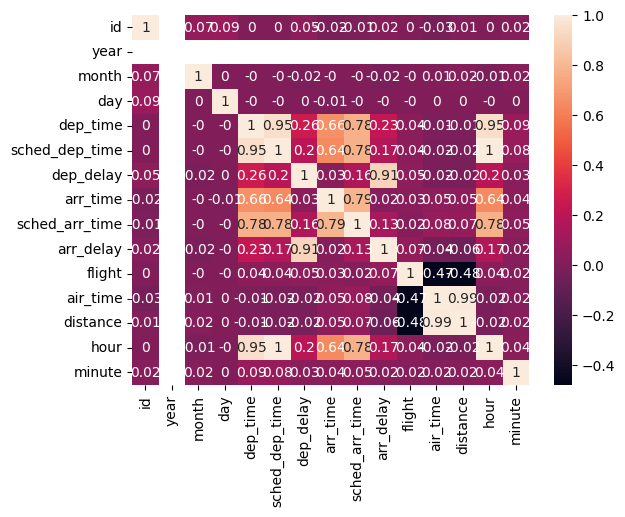

In [5]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True)

In [6]:
def imputeWithKNN(data):
    for col in data.select_dtypes(include="number").columns:
        data[[col]] = KNNImputer().fit_transform(data[[col]])

imputeWithKNN(df)

- ☝️ `le choix d'une methode d'imputation doit toujours etre justifiee, pourquoi avoir choisi KNNImputer ?, 👉 revoir la correction`

In [7]:
df.isna().sum()

,0
id,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0


In [ ]:
df['tailnum'] = df['tailnum'].fillna(df['tailnum'].mode()[0]) # ✅

In [9]:
df.isna().sum()

,0
id,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0


## Question 2: Traitement des valeurs abberantes

- 👇🏻 `mettre ceci dans un fichier .py puis l'importer plutot que de repeter ce code inutilement`

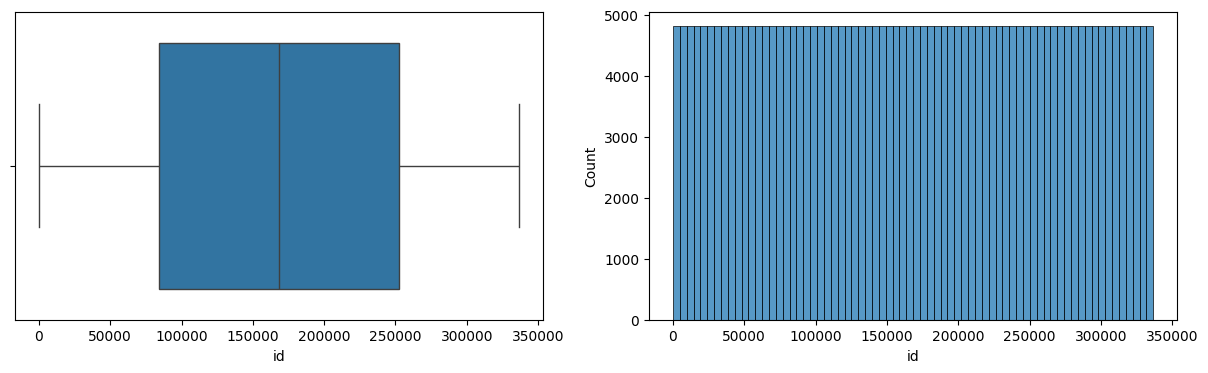

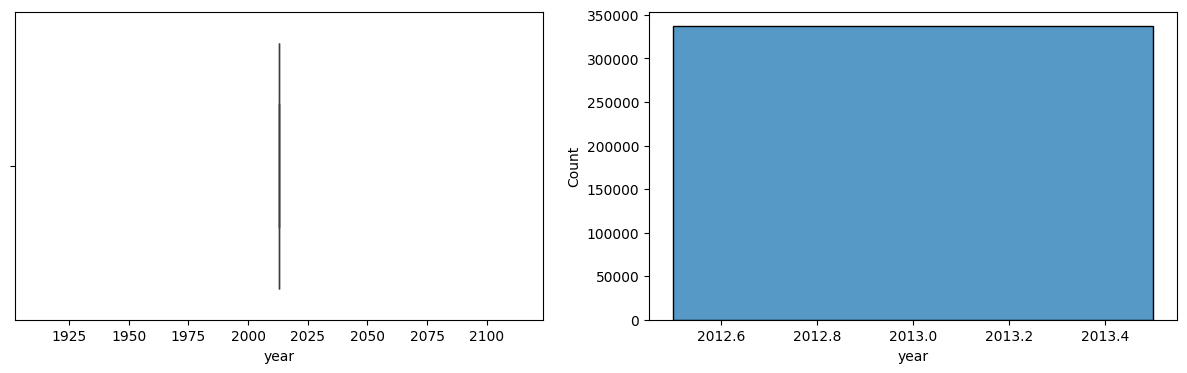

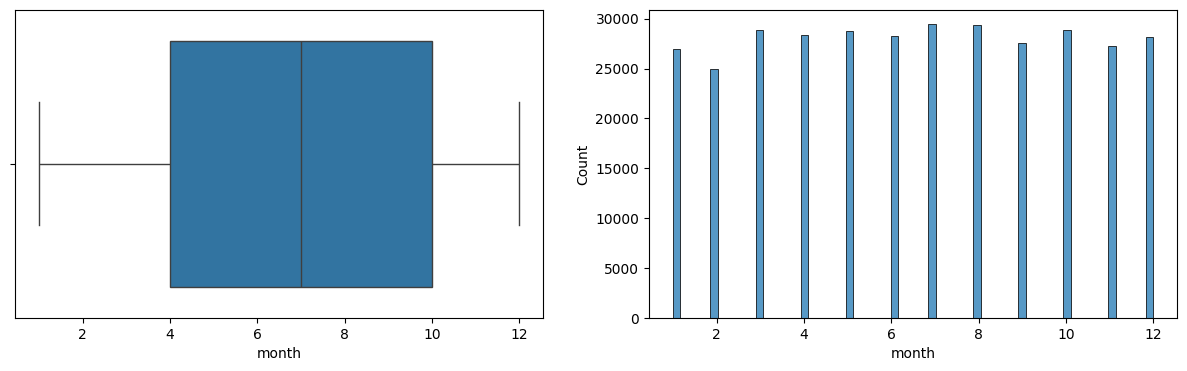

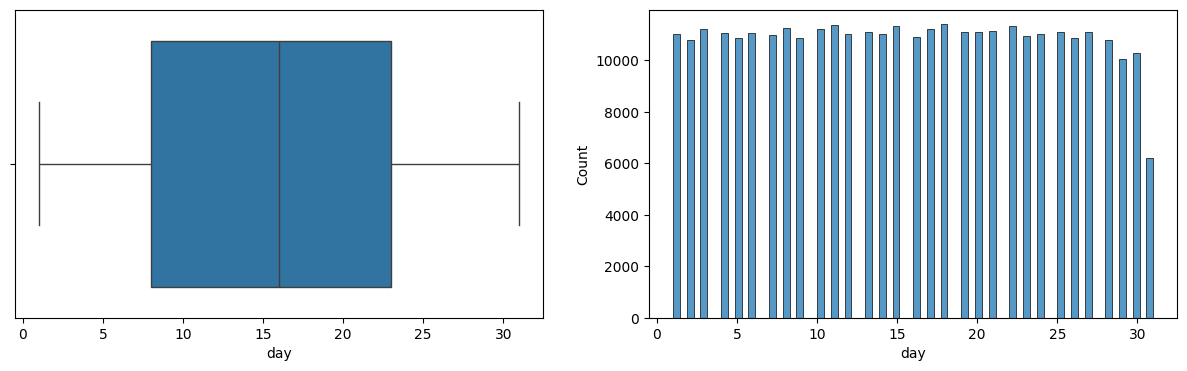

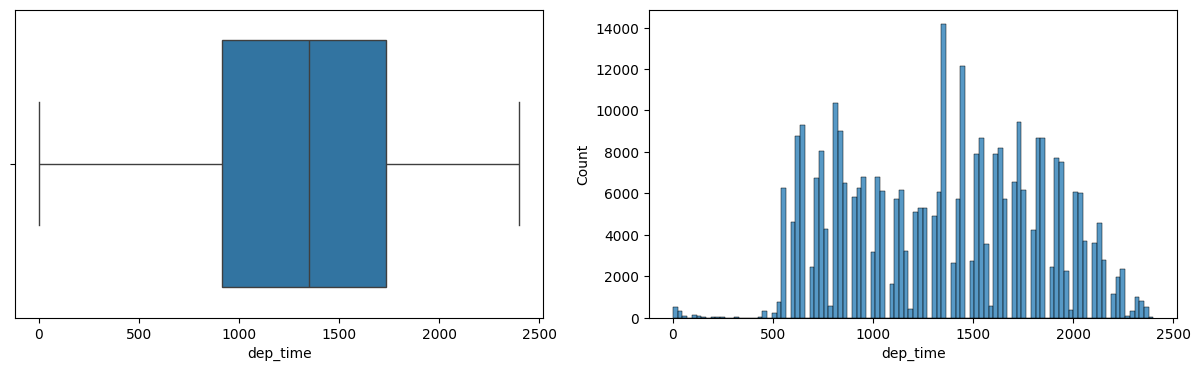

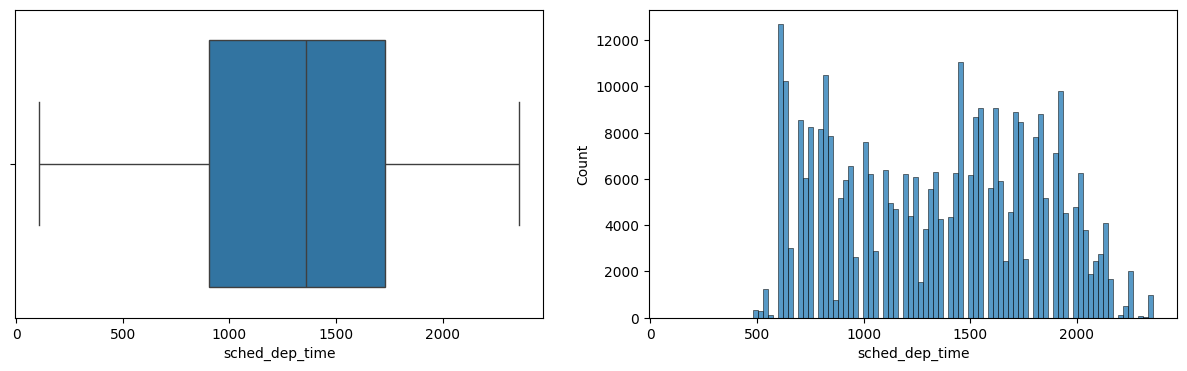

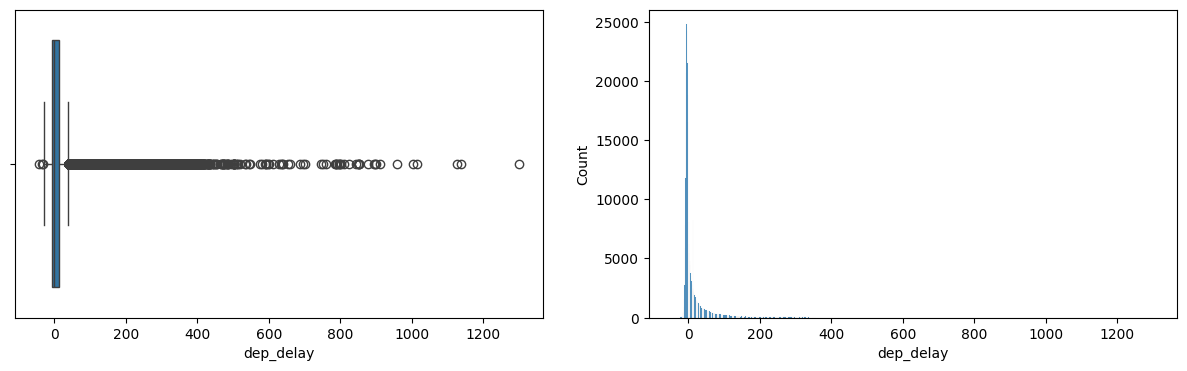

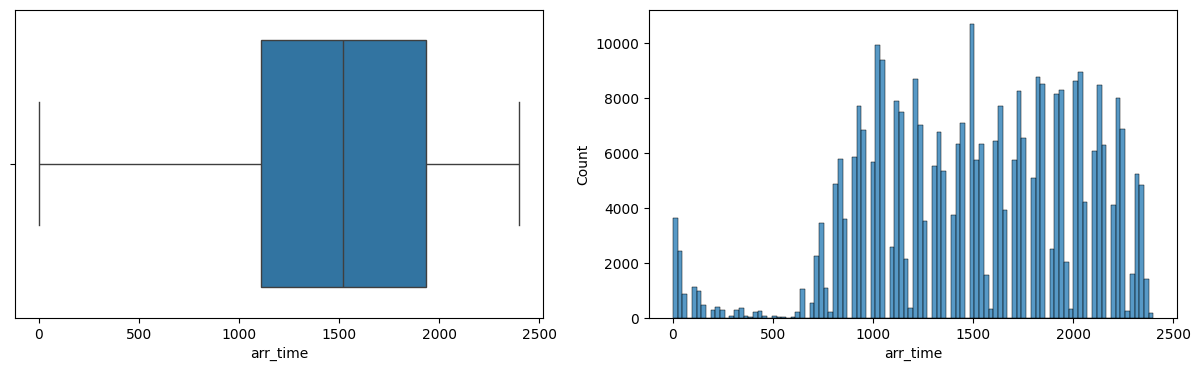

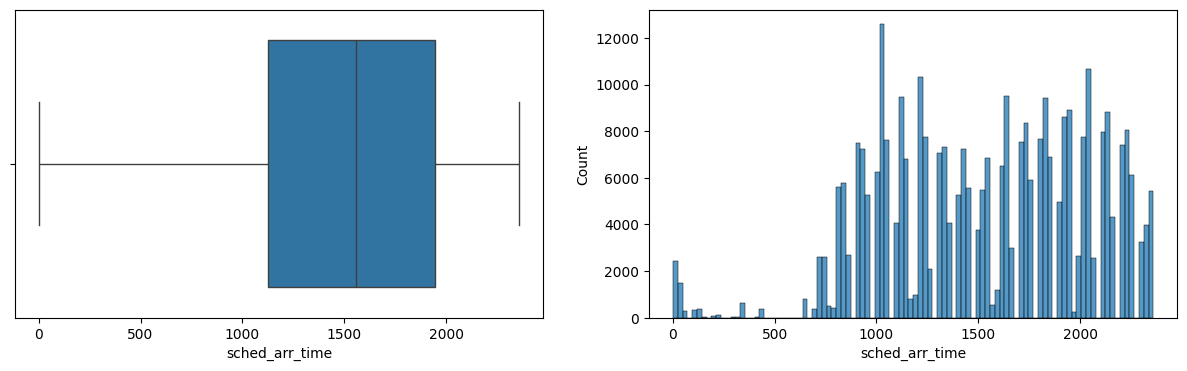

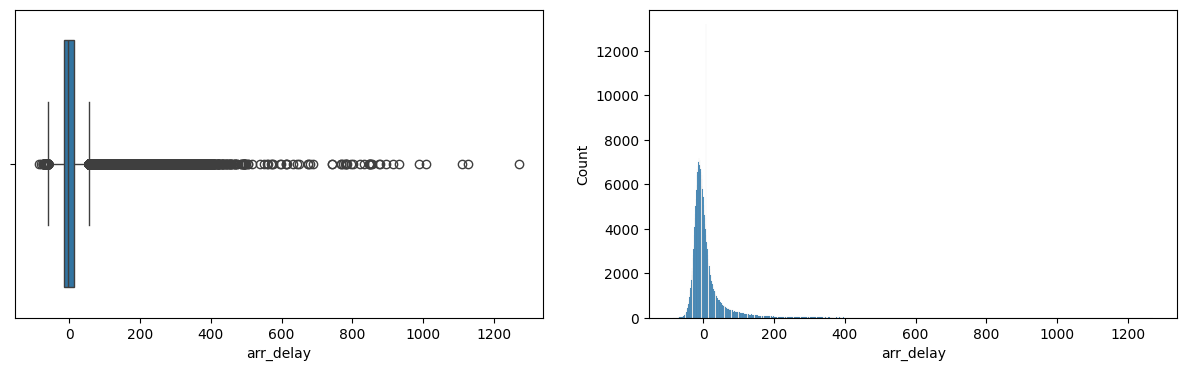

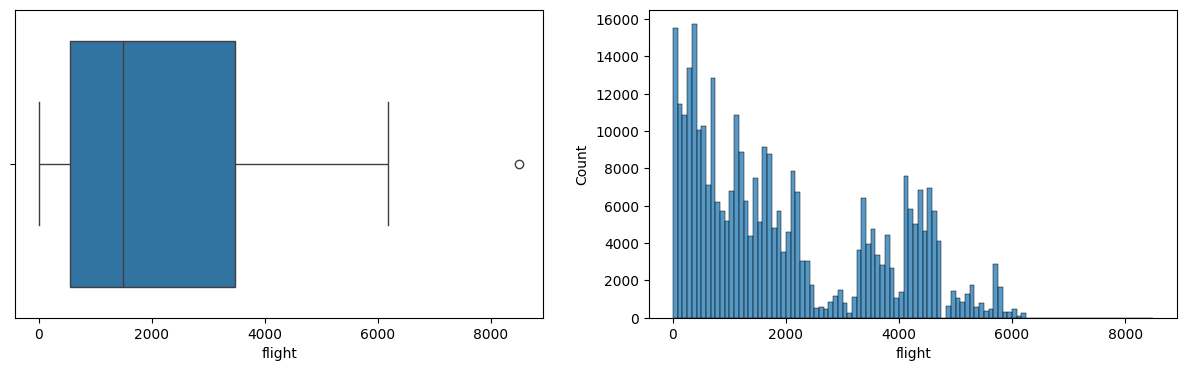

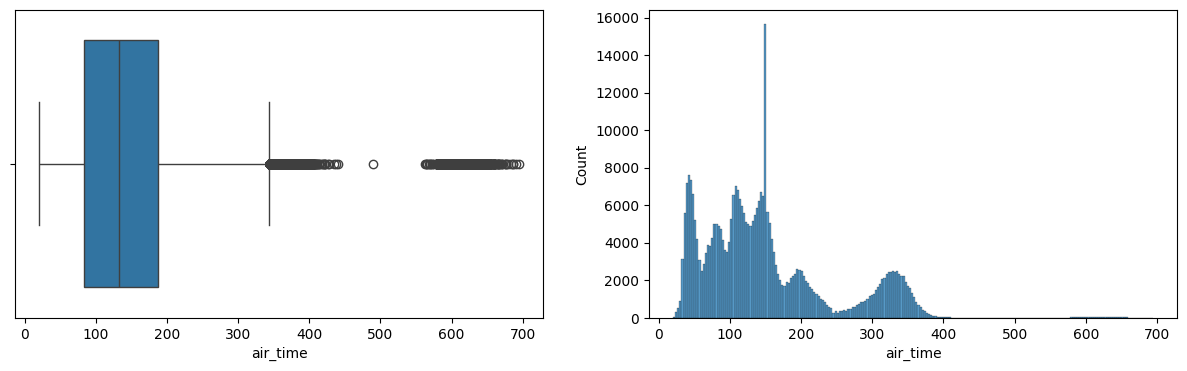

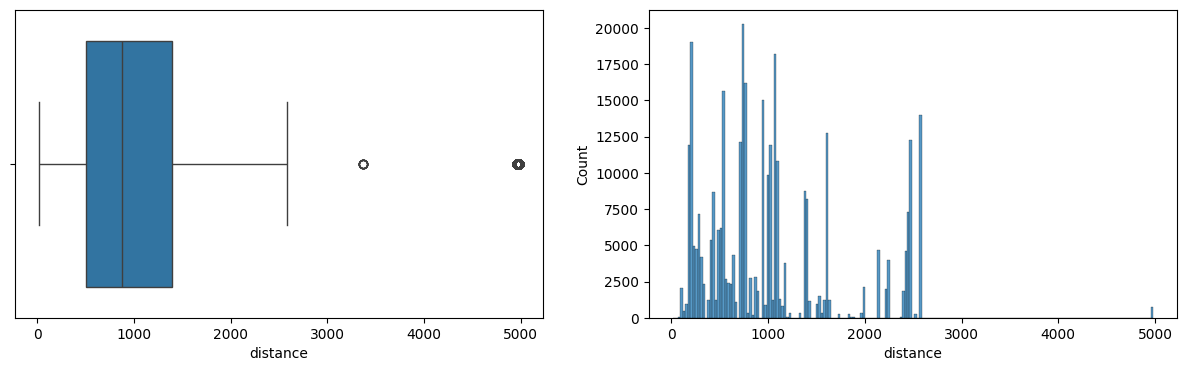

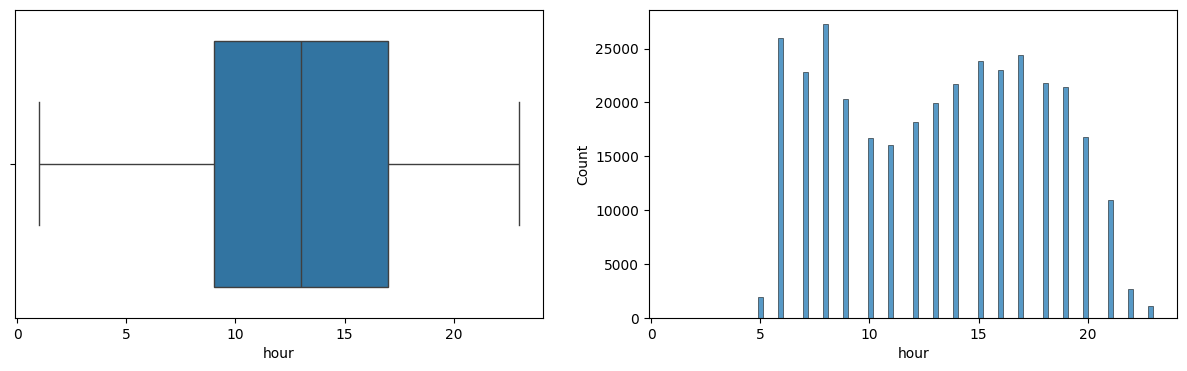

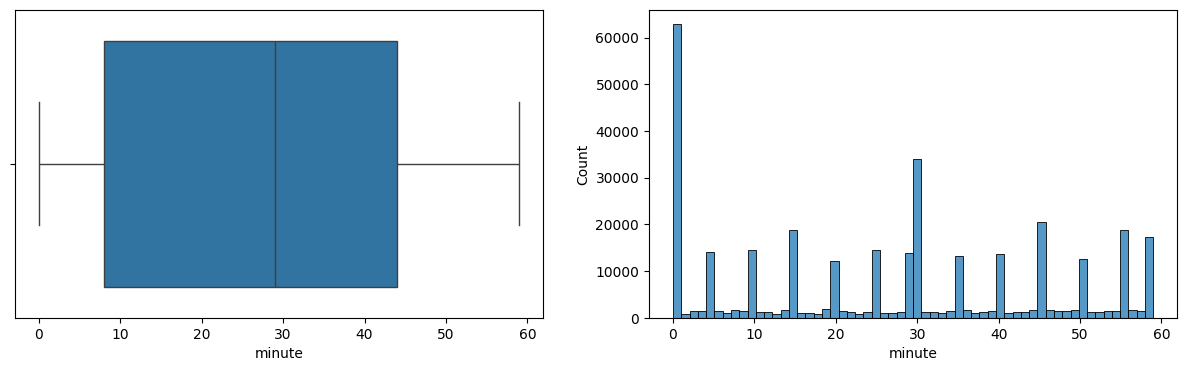

In [10]:
def graphics(data, nrows=1, ncols=2):
    for col in data.select_dtypes('number').columns:
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4))
        sns.boxplot(x=data[col], ax=axes[0])
        sns.histplot(data[col], ax=axes[1])
    plt.show()

graphics(df)

- 👇🏻 `mettre ceci dans un fichier .py puis l'importer plutot que de repeter ce code inutilement`

In [ ]:
def imputeOutlierIQR(data):
    for col in data.select_dtypes('number').columns:
        if not (-0.5 <= data[col].skew() <= 0.5):
            q1 = np.quantile(data[col], 0.25)
            q3 = np.quantile(data[col], 0.75)
            iqr = q3 - q1
            limitMin = q1 - 1.5*iqr
            limitMax = q3 + 1.5*iqr
            data[col] = np.where(data[col] <= limitMin, limitMin, data[col])
            data[col] = np.where(data[col] >= limitMax, limitMax, data[col])


- ☝️ `le choix d'une methode d'imputation doit toujours etre justifiee, pourquoi avoir choisi IQR ?, donner la raison, 👉 revoir la correction`

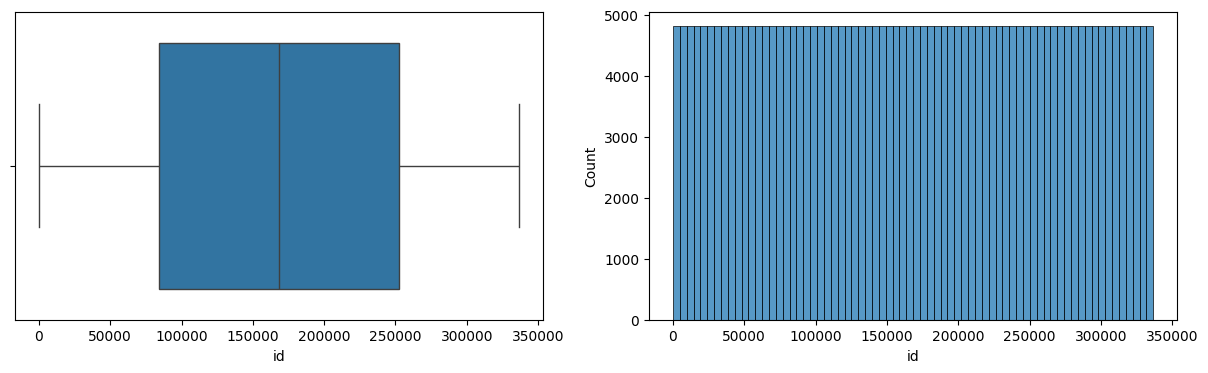

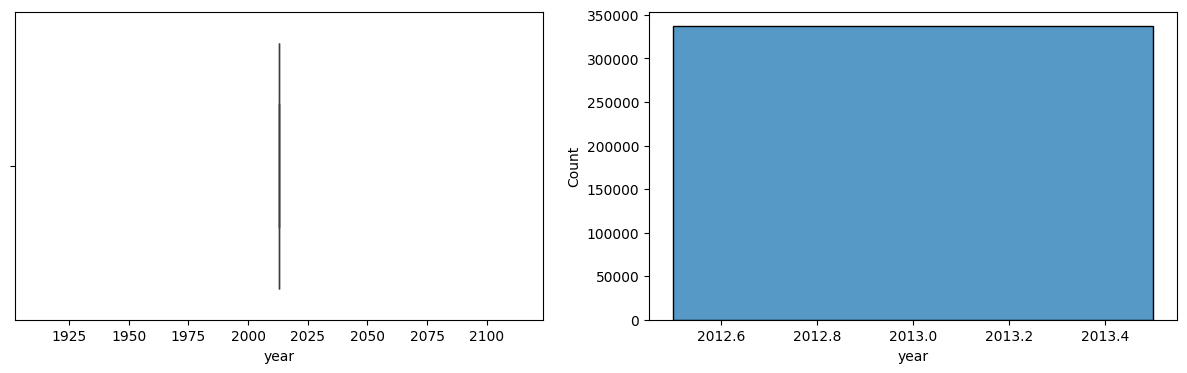

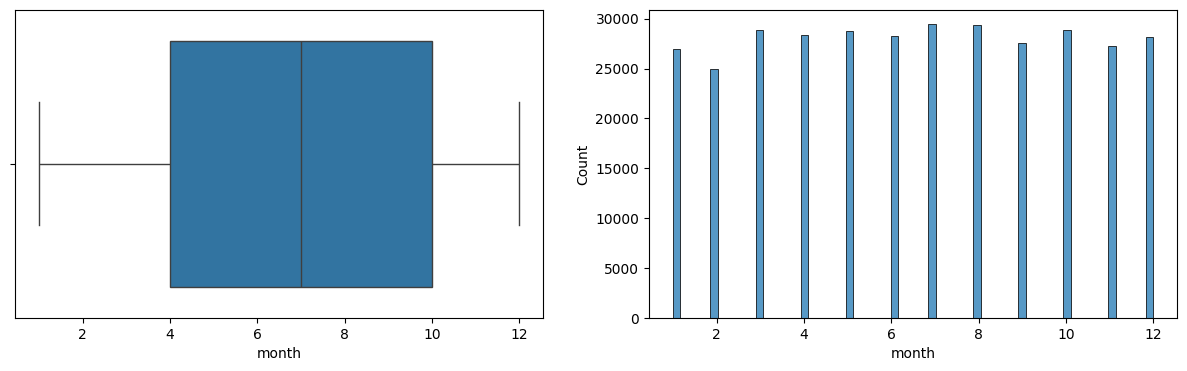

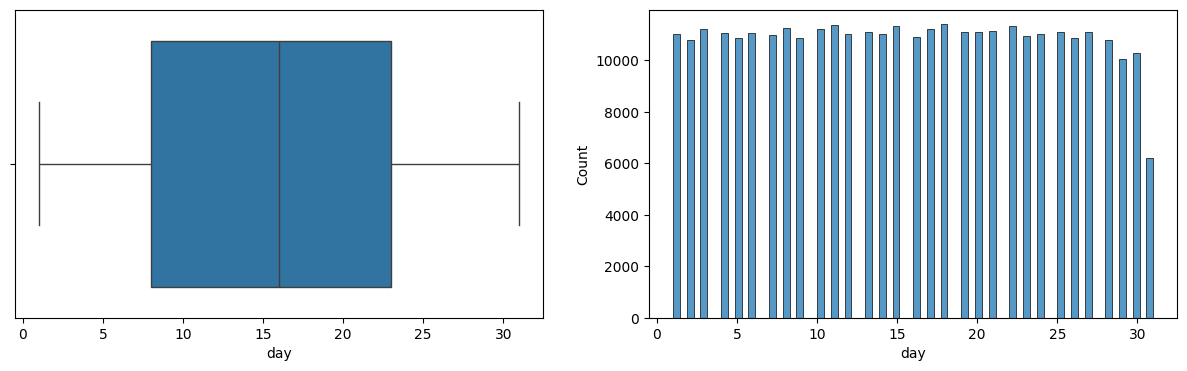

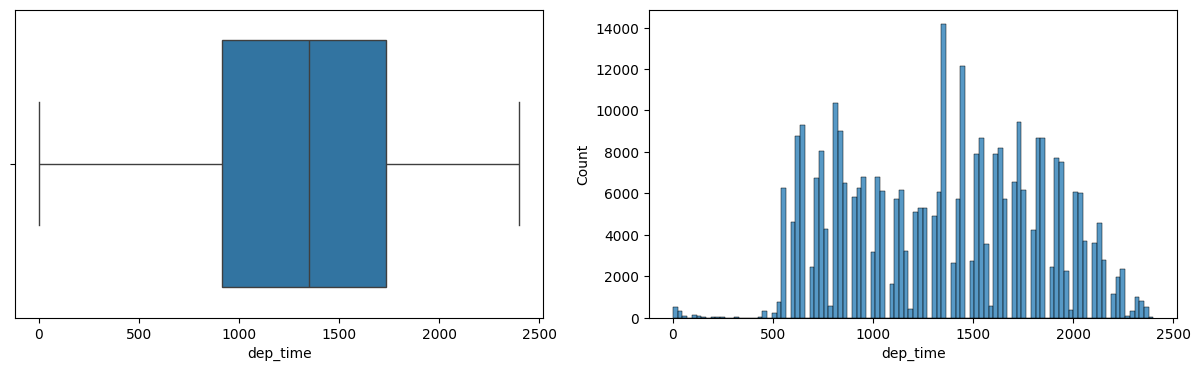

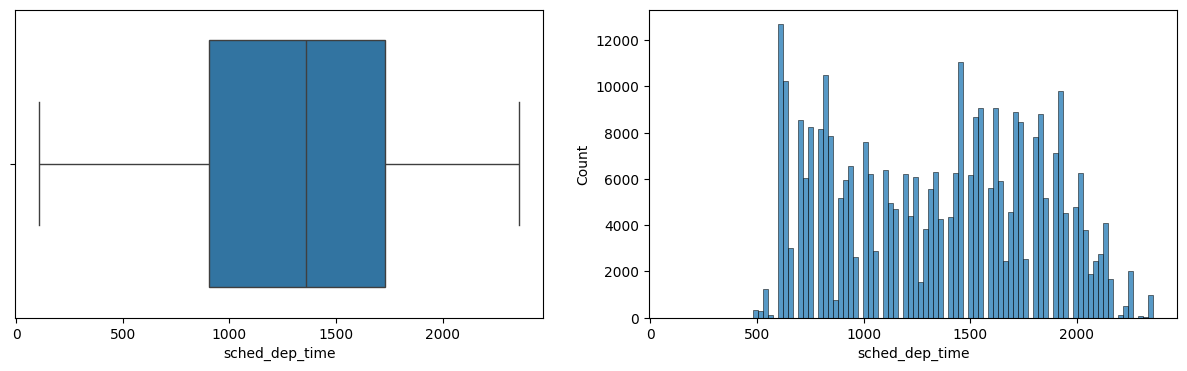

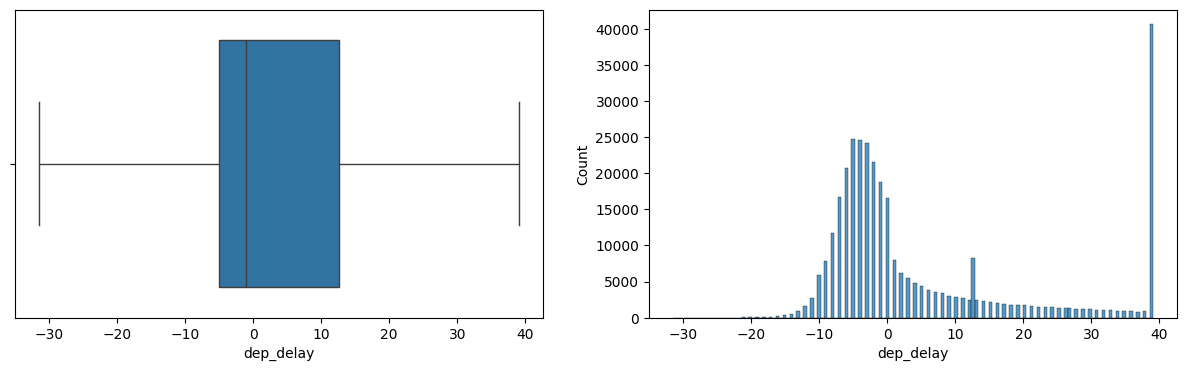

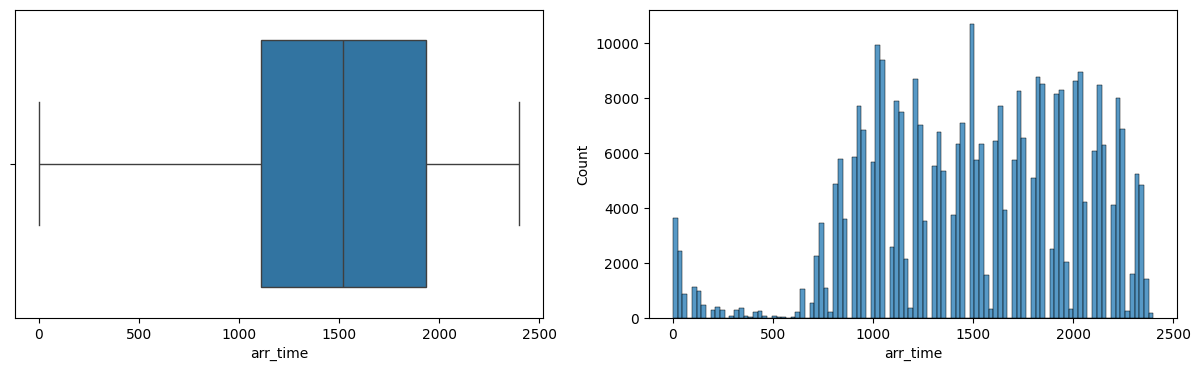

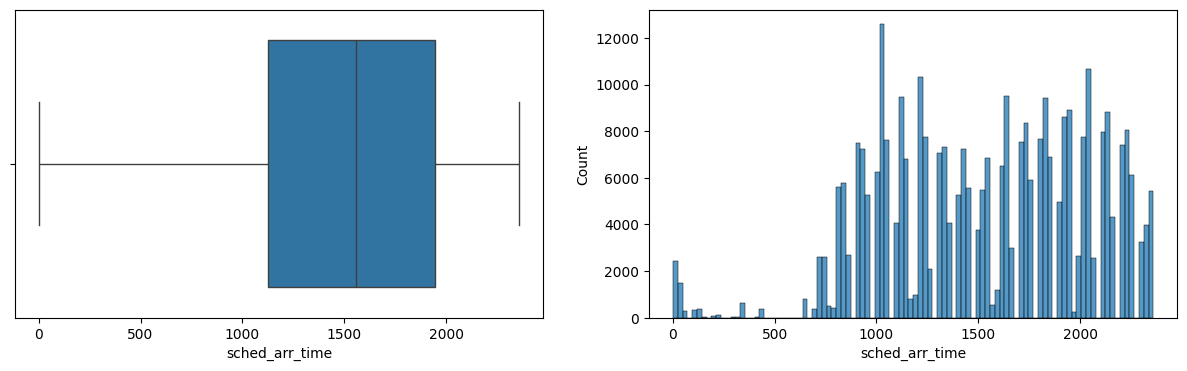

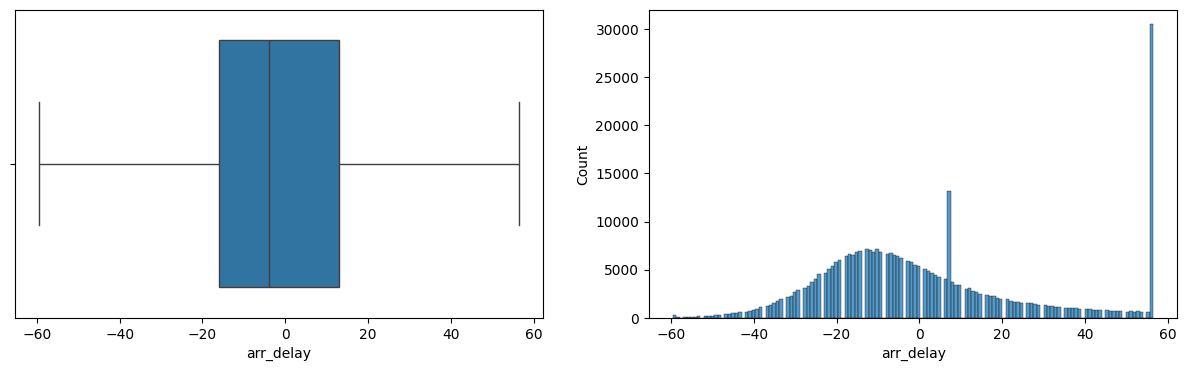

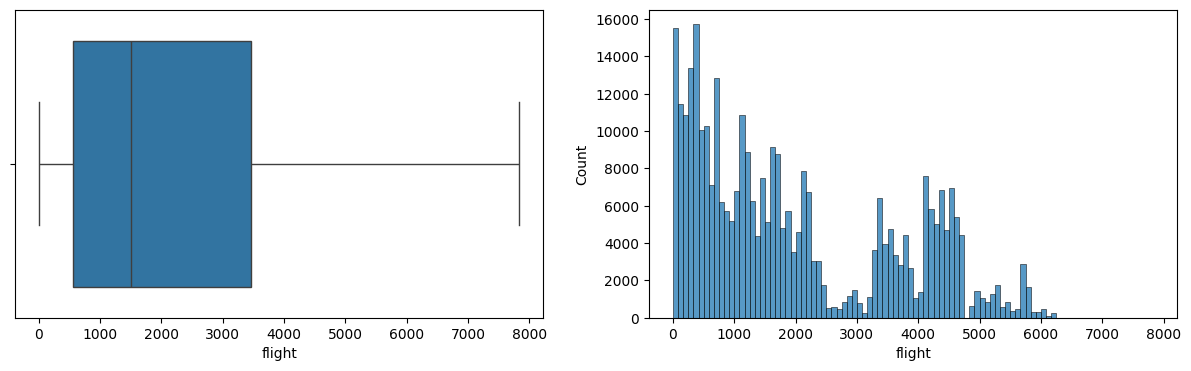

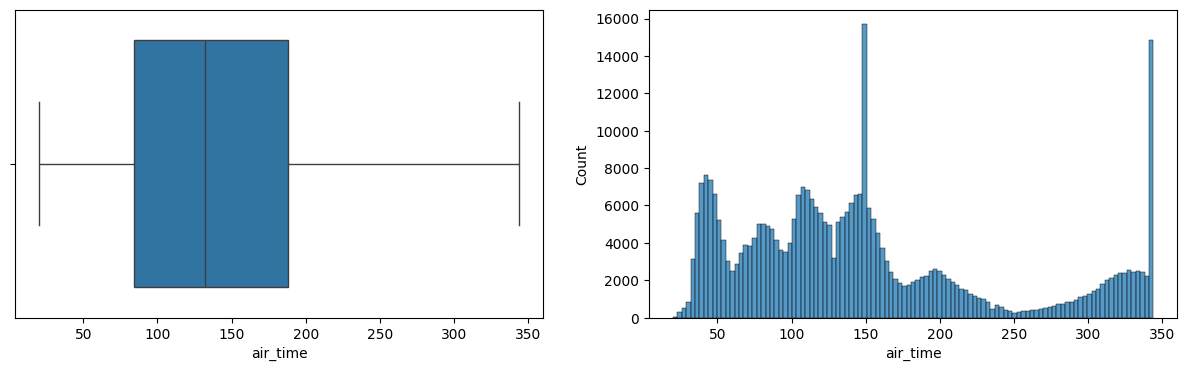

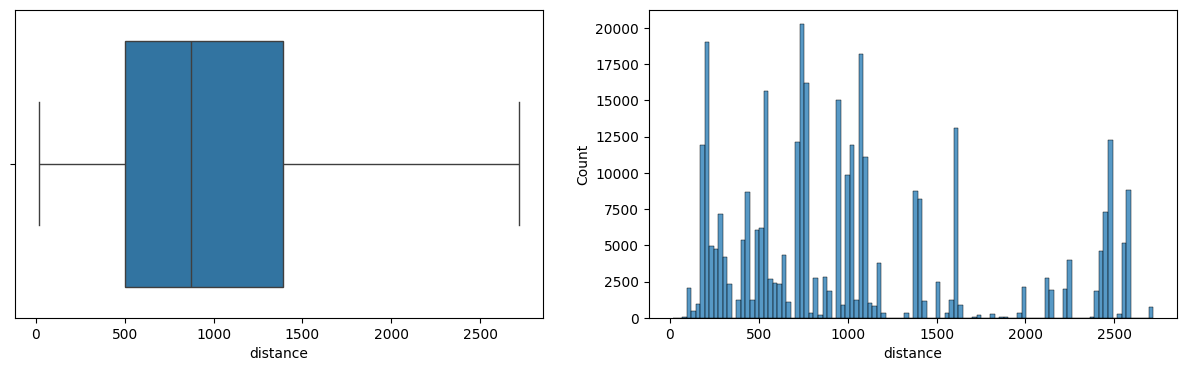

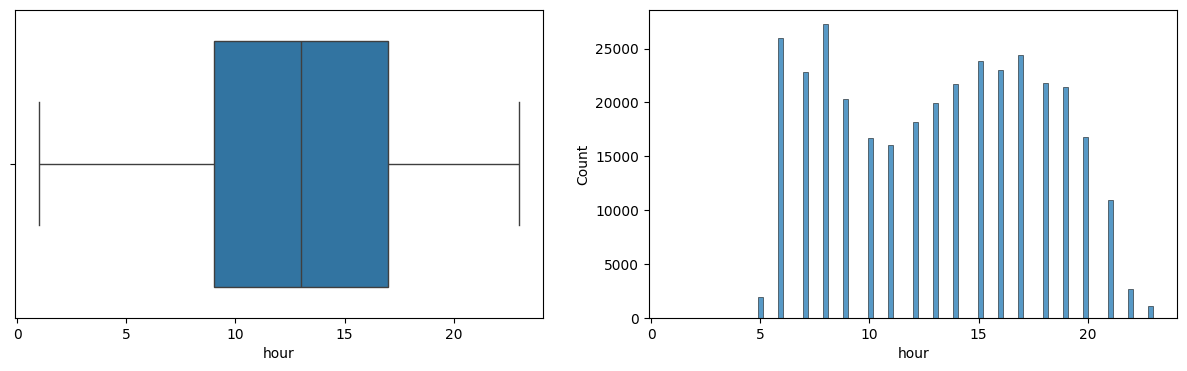

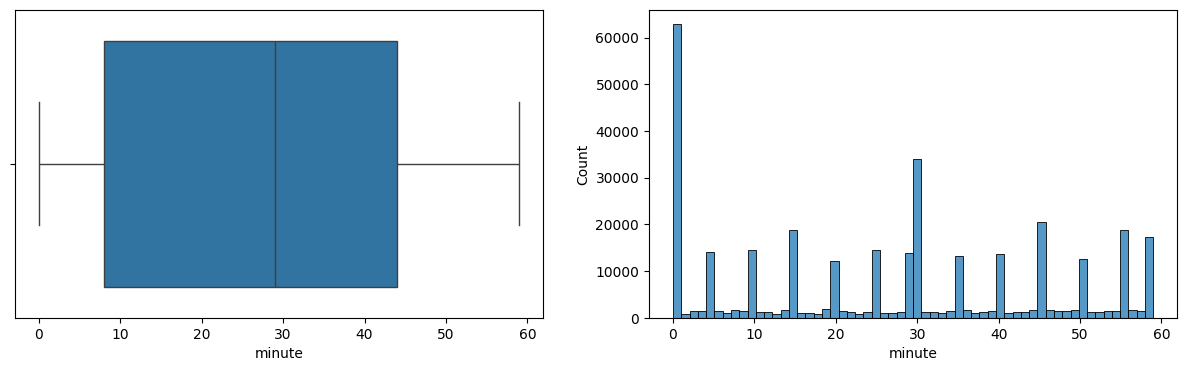

In [ ]:
imputeOutlierIQR(df)
graphics(df)

## Question 3: la répartition des vols par compagnie aérienne

In [11]:
Q3 = df['name'].value_counts().sort_values(ascending=False)
Q3

,count
name,
United Air Lines Inc.,58665
JetBlue Airways,54635
ExpressJet Airlines Inc.,54173
Delta Air Lines Inc.,48110
American Airlines Inc.,32729
Envoy Air,26397
US Airways Inc.,20536
Endeavor Air Inc.,18460
Southwest Airlines Co.,12275


/tmp/ipython-input-12-135484010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Q3, x='Compagnie', y='Nombre_vols', palette='hsv')


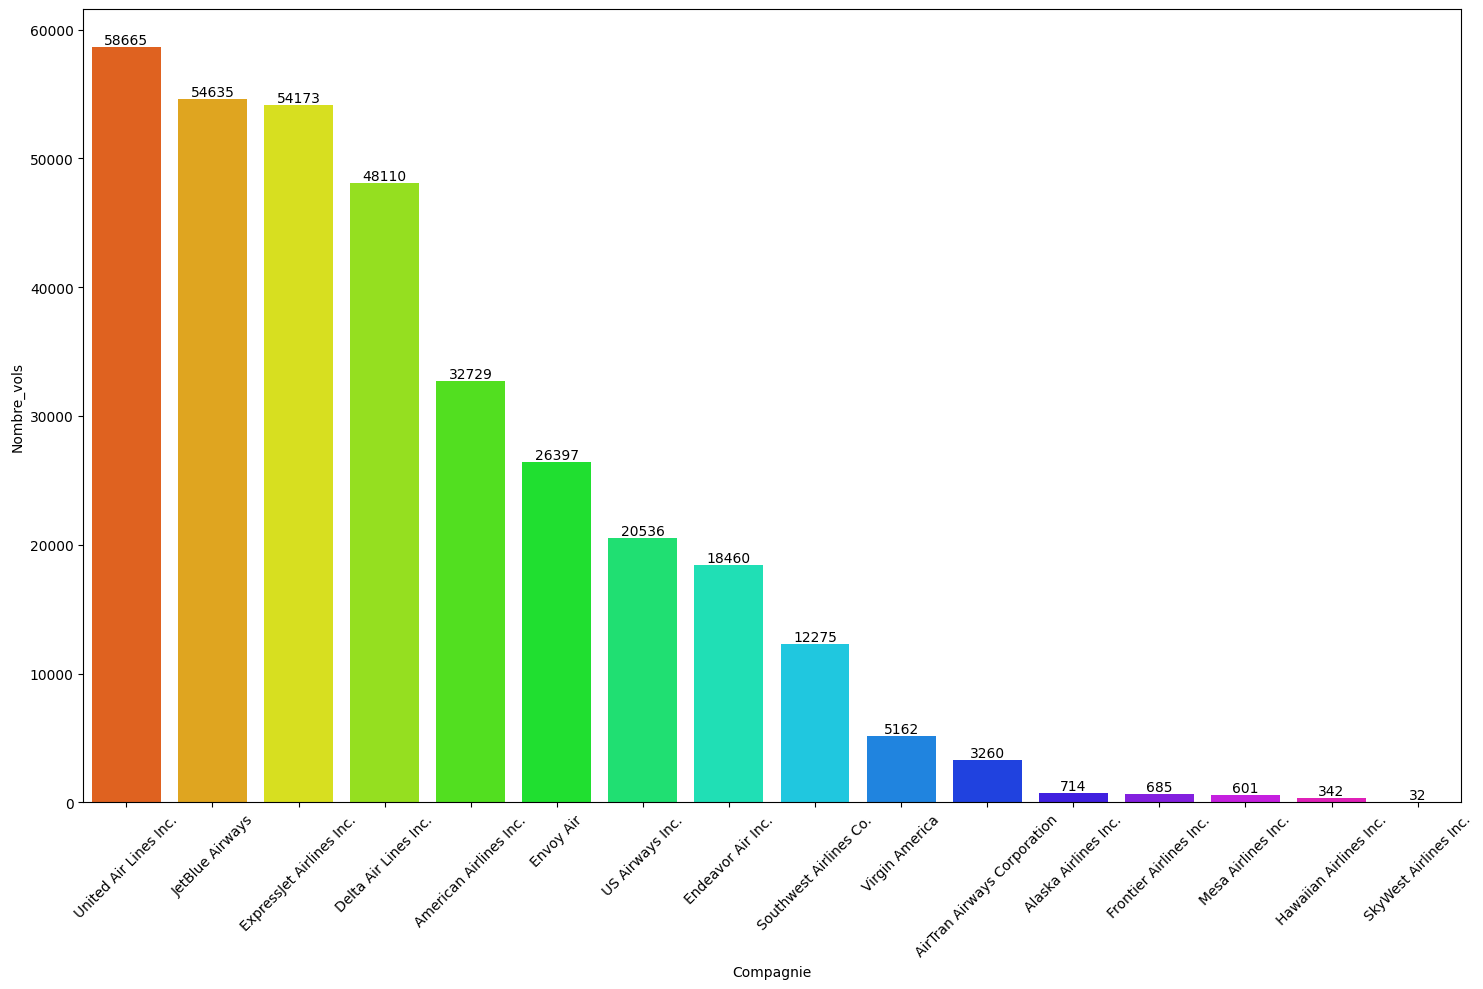

In [12]:
Q3 = df['name'].value_counts().reset_index()
Q3.columns = ['Compagnie', 'Nombre_vols']

plt.figure(figsize=(15,10))
ax = sns.barplot(data=Q3, x='Compagnie', y='Nombre_vols', palette='hsv')

for bar in ax.containers:
    ax.bar_label(bar)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### - La compagnie ayant le plus grand nombre de vol est : United Air Lines Inc avec 58665 vols.
### - La compagnie ayant le plus petit nombre de vol est : SkyWest Air Lines Inc avec 32 vols

## question 4 :  la répartition du nombre de vols retardés au depart par mois

In [ ]:
df_retards = df[df['dep_delay'] > 0]
retards_par_mois = df_retards['month'].value_counts().sort_index()
retards_par_mois

,count
month,
1.0,10183
2.0,10385
3.0,12070
4.0,11211
5.0,11854
6.0,13664
7.0,14849
8.0,12199
9.0,8267


✅

/tmp/ipython-input-22-3548893270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retards_par_mois.index,


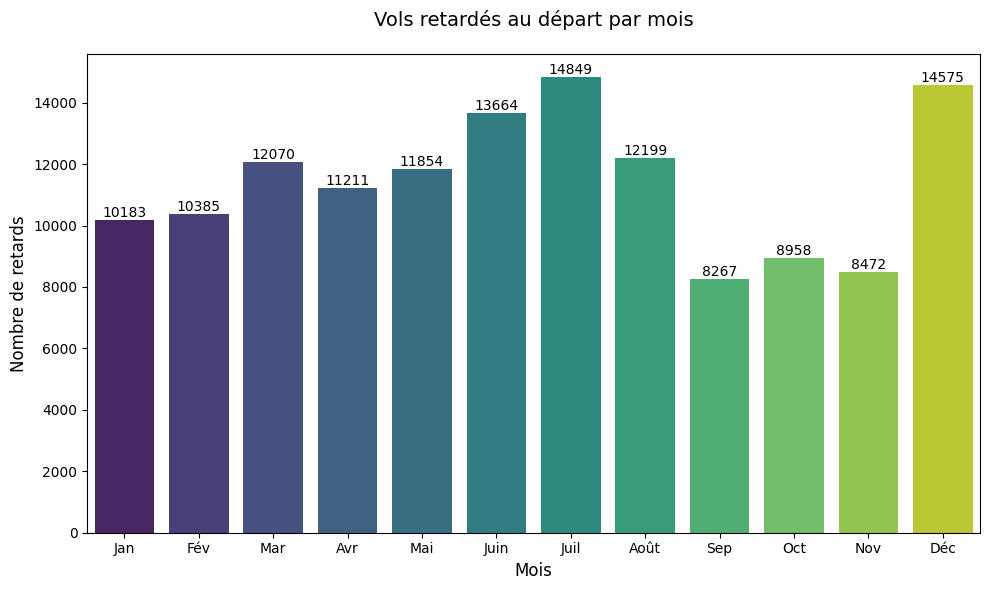

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x=retards_par_mois.index,
            y=retards_par_mois.values,
            palette='viridis')

plt.title('Vols retardés au départ par mois', fontsize=14, pad=20)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de retards', fontsize=12)
plt.xticks(range(12), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', # 👈🏼 ❌ evite de faire ce genre de chose, il te suffit d'ecrire df['month'] = df['time_hour'].dt.month_name()
                      'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
for i, v in enumerate(retards_par_mois.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Nous constatons que les retards au départ sont plus fréquents en juillet et en décembre par rapport aux autres mois, cela peut-etre du par une forte affluence de passagers, une surcharge des aéroports et parfois des conditions météo défavorables durant ces deux mois

## Question 5: la répartition du nombre de vols retardés à l'arrivée par mois

/tmp/ipython-input-73-1836978518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index, y=data.values, palette='coolwarm')


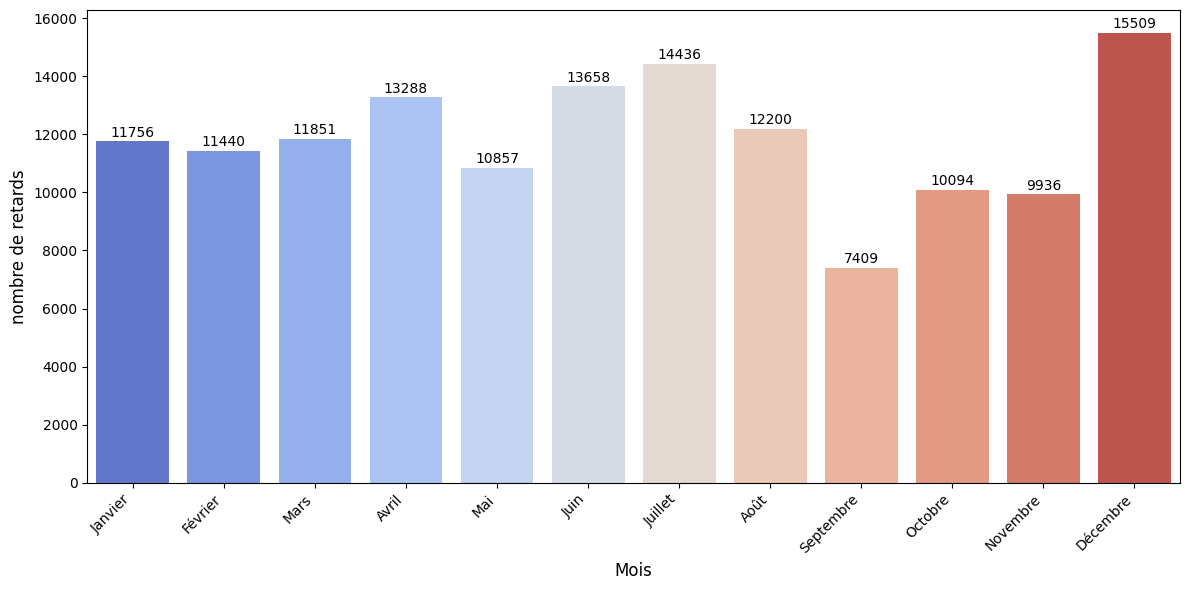

In [ ]:
retards_arrivee = df[df['arr_delay'] > 0]
retards_par_mois = retards_arrivee['month'].value_counts().sort_index()

noms_mois = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
             'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'] 
def visualisation(data, label_y, noms_mois=noms_mois):
  plt.figure(figsize=(12, 6))
  ax = sns.barplot(x=data.index, y=data.values, palette='coolwarm')

  plt.xlabel('Mois', fontsize=12)
  plt.ylabel(label_y, fontsize=12)
  plt.xticks(range(12), noms_mois, rotation=45, ha='right')

  for i, valeur in enumerate(data.values):
      ax.text(i, valeur + 50, str(valeur), ha='center', va='bottom',fontsize=10)
  plt.tight_layout()
  plt.show()

visualisation(retards_par_mois, "nombre de retards")

#### Comme dans la question 5, Nous constatons egalement que les retards a l'arrivé sont plus fréquents en juillet et en décembre par rapport aux autres mois, et c'est normal, un retard au depart entraine souvent un retard a l'arrivé

## Question 6 : les retards au cours de la journée

In [27]:
df['jour'] = pd.to_datetime(df['time_hour']).dt.day_name()
Q6 = df[(df['arr_delay'] > 0) | (df['dep_delay'] > 0)] \
    .groupby('jour')[['dep_delay', 'arr_delay']].mean()

# Réorganiser les jours dans l'ordre de la semaine
ordre_jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
Q6 = Q6.reindex(ordre_jours)

### visualisation

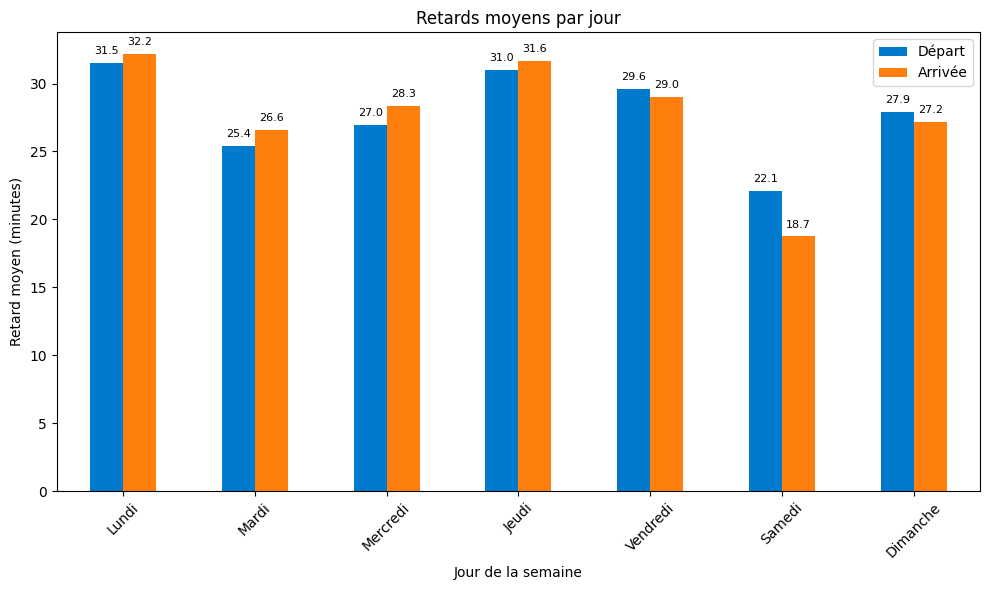

In [25]:
ax = Q6.plot(kind='bar', figsize=(10,6), color=['#007acc', '#ff7f0e'])
plt.title('Retards moyens par jour')
plt.xlabel('Jour de la semaine')
plt.ylabel('Retard moyen (minutes)')
plt.xticks(rotation=45)
plt.legend(['Départ', 'Arrivée'])

for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if not pd.isna(height):
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Nous constatons que les lundis et jeudis enregistrent les retards moyens les plus élevés, aussi bien au départ qu’à l’arrivée.
#### De plus, entre lundi et jeudi, les retards à l’arrivée sont en général plus importants que ceux au départ, ce qui peut refléter un effet cumulatif des retards sur les vols enchaînés.
#### En revanche, à partir de vendredi jusqu’au dimanche, c’est l’inverse : les retards au départ deviennent plus fréquents, probablement en lien avec les pics de trafic de fin de semaine

## Question 7 : la compagnie ayant accusé le plus de retard ?

/tmp/ipython-input-61-3521447693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=retards_compagnies.index, y=retards_compagnies.values, palette='coolwarm')


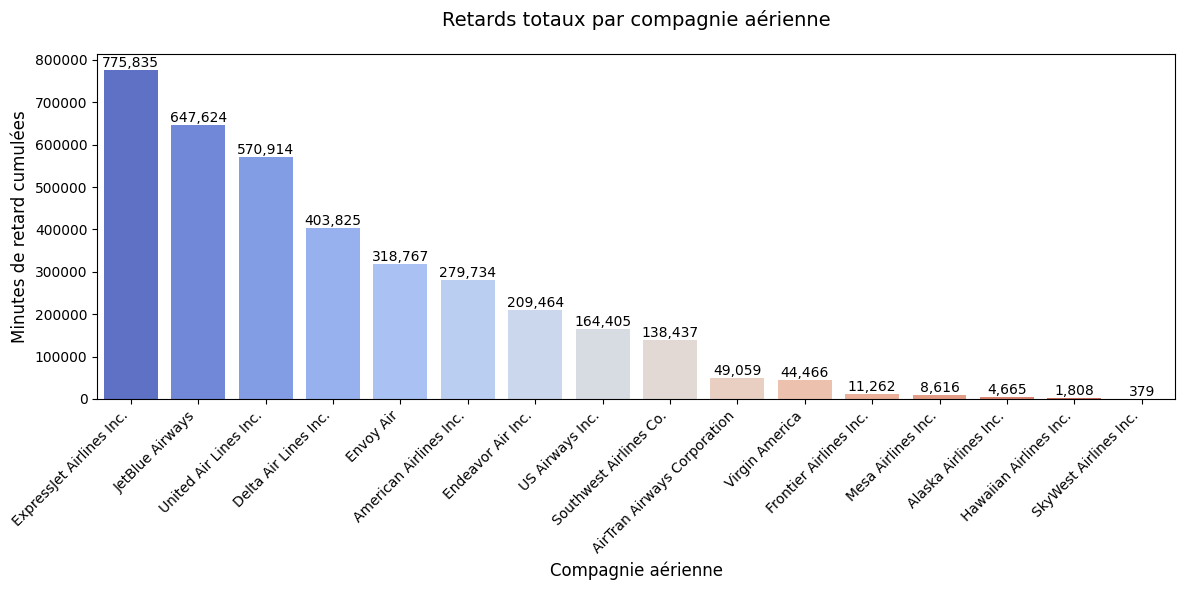

In [ ]:
Q7 = df[df['arr_delay']>0].groupby('name')['arr_delay'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=Q7.index, y=Q7.values, palette='coolwarm')

plt.xlabel('Compagnie aérienne', fontsize=12)
plt.ylabel('Minutes de retard cumulées', fontsize=12)
plt.title('Retards totaux par compagnie aérienne', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')

for i, valeur in enumerate(Q7.values):
    ax.text(i, valeur,
            f'{int(valeur):,}',
            ha='center',
            va='bottom',
            fontsize=10)

plt.tight_layout()
plt.show()

### la compagnie qui a accumuée le plus de retard est Expressjet Airlines Inc avec 828458 minutes

## Question 8 :  répartition des retards moyens en fonction des différents modèles d'avions (tailnum)

/tmp/ipython-input-60-573238110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Q8.head(50).values,


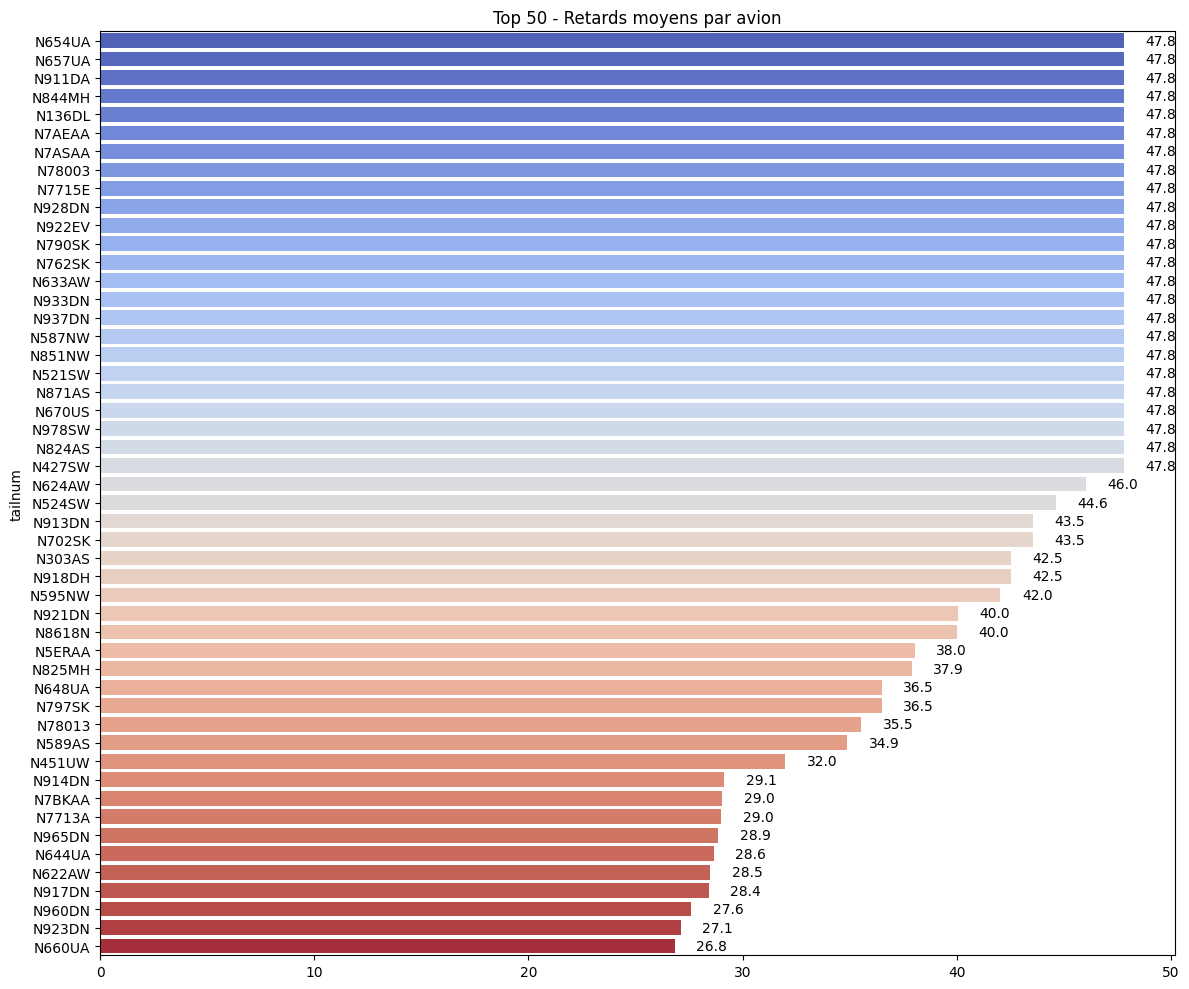

In [ ]:
                                                          # 👇🏻 ???
df['moyenne_delay'] = df[['dep_delay', 'arr_delay']].mean(axis=1)
Q8 = df.groupby('tailnum')['moyenne_delay'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=Q8.head(50).values,
            y=Q8.head(50).index,
            palette='coolwarm')

for i, v in enumerate(Q8.head(50).values):
    ax.text(v + 1, i, f"{v:.1f}", va='center')
plt.title('Top 50 - Retards moyens par avion')
plt.tight_layout()
plt.show()

- De la question 6, jusqu'à la question 8, **regarde bien le notebook corrigé**, tu as tout melangé, n'écris jamais ce genre de code ☝️

#### Nous constantons que plusieurs models d'avions accumulent un retard moyens important de 47 min, contrairement d'autres

## Question 9 :  Mettre les variables à une échelle commune si nécessaire, sans modifier les distributions de données

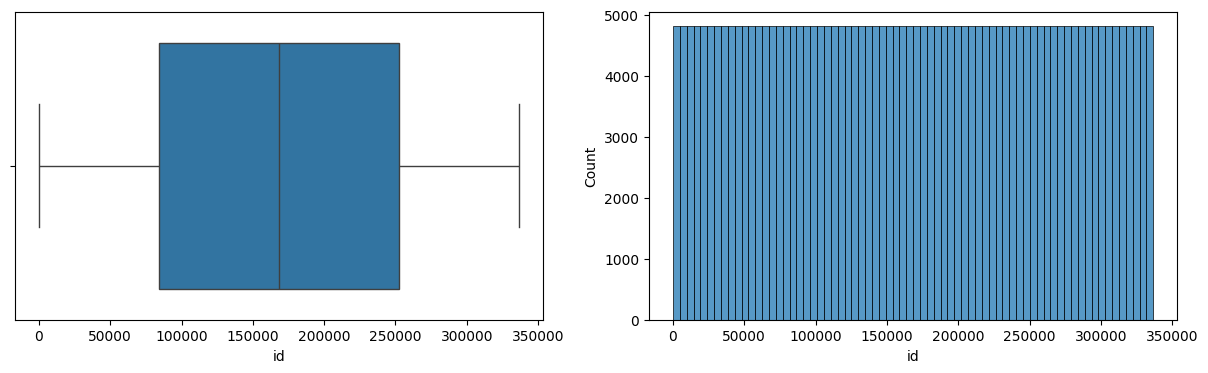

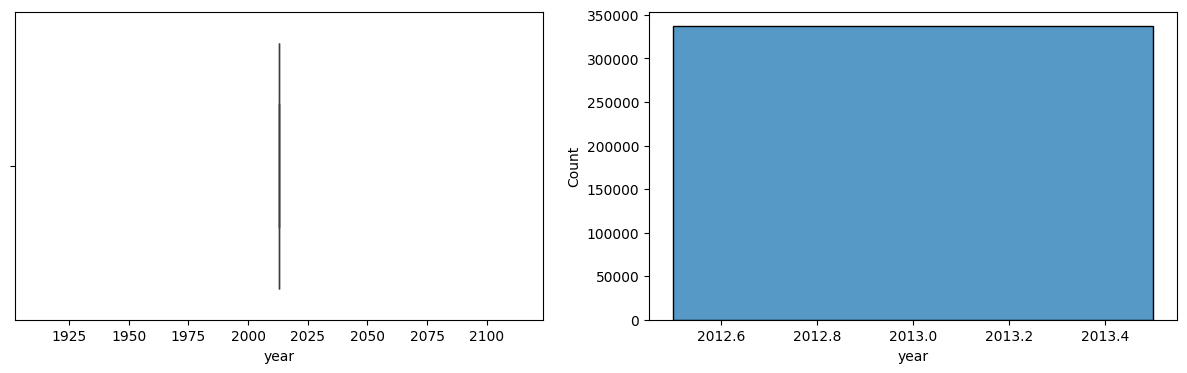

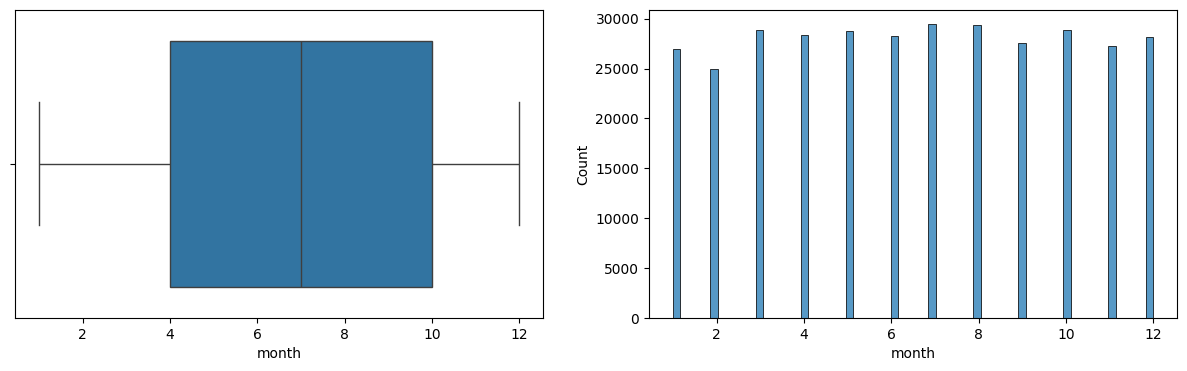

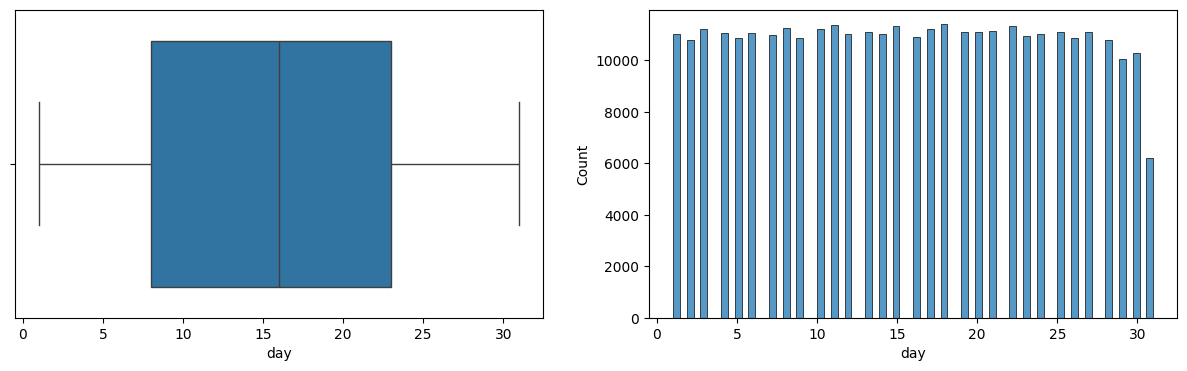

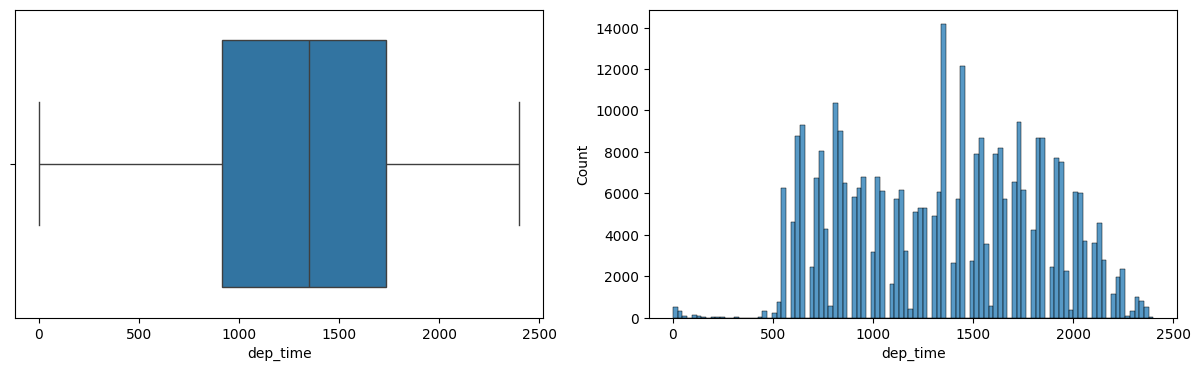

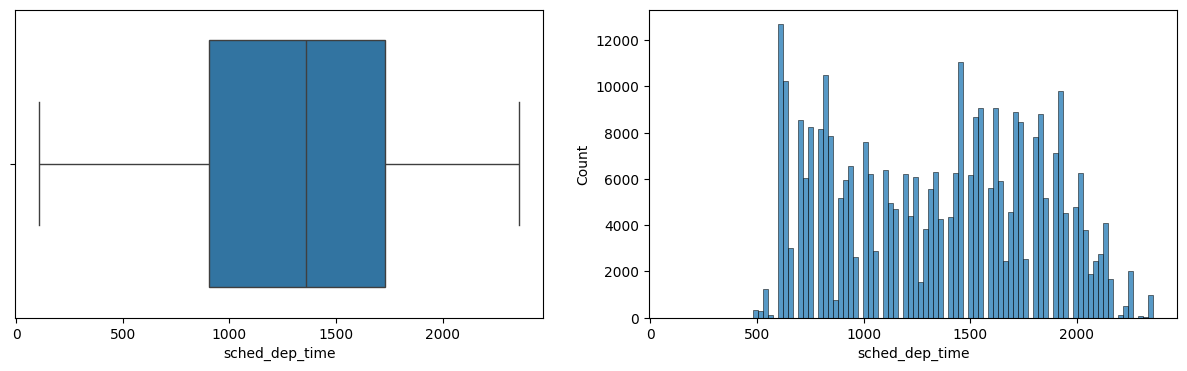

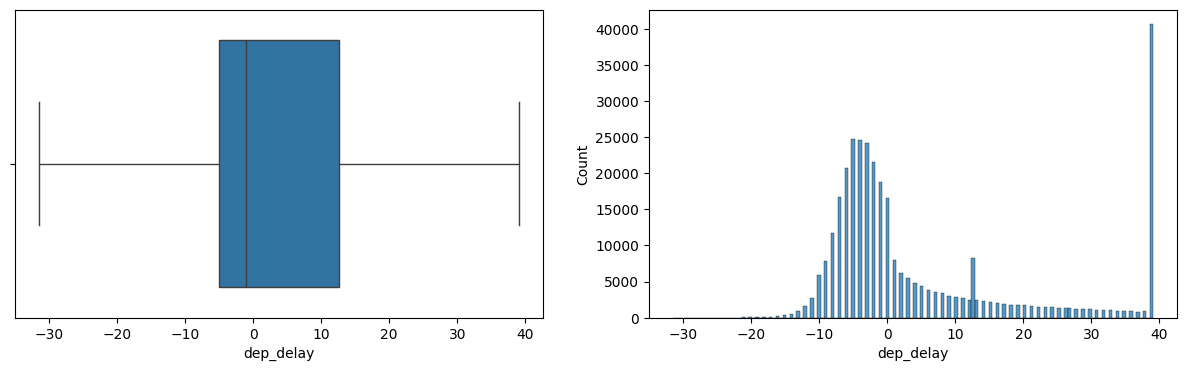

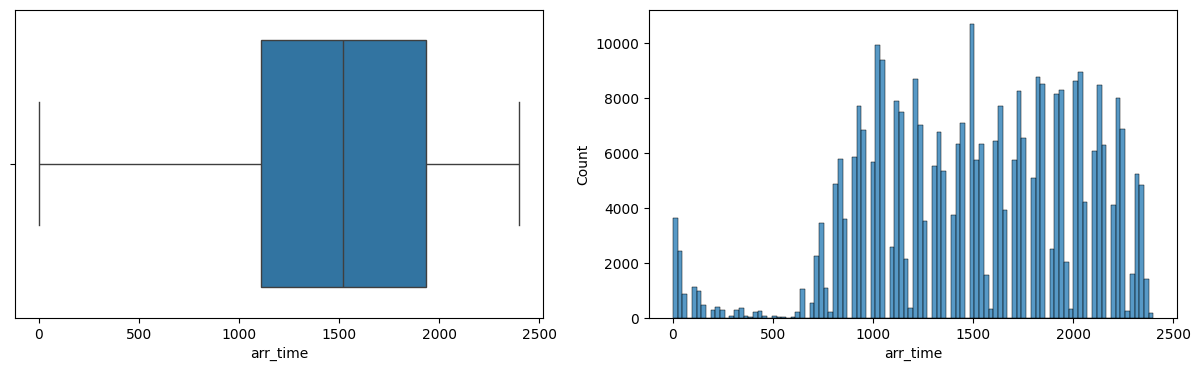

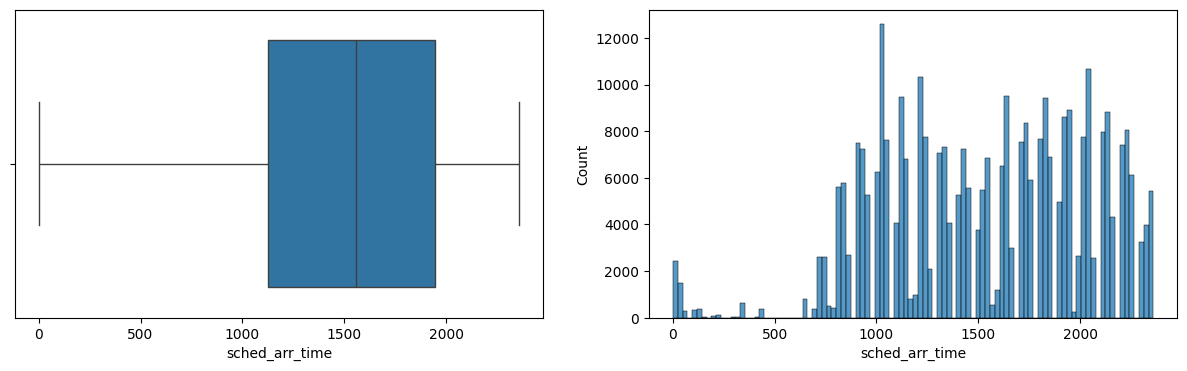

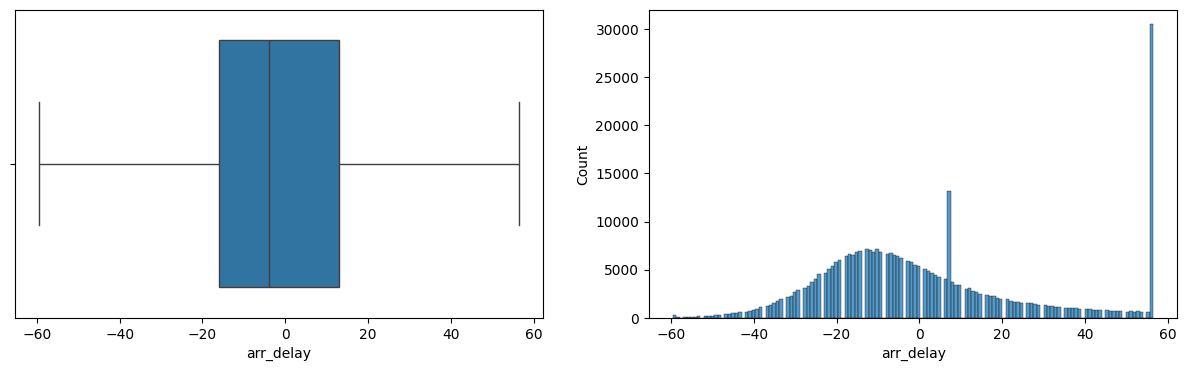

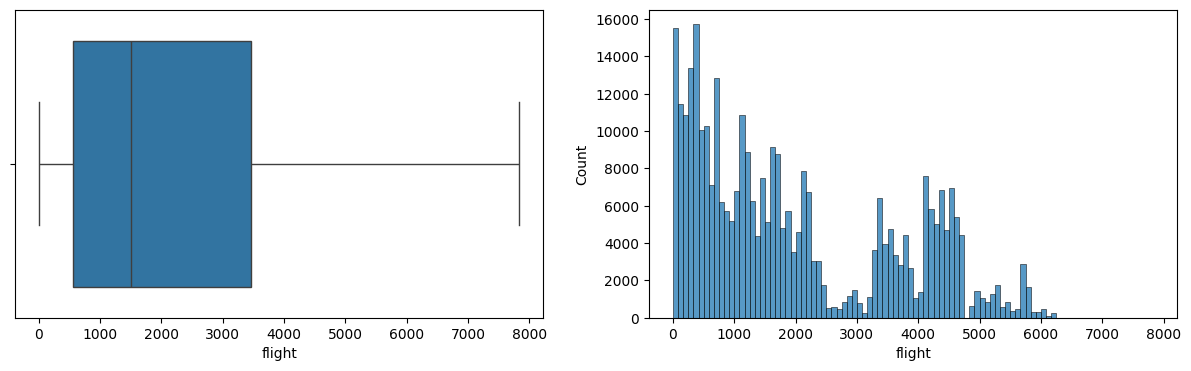

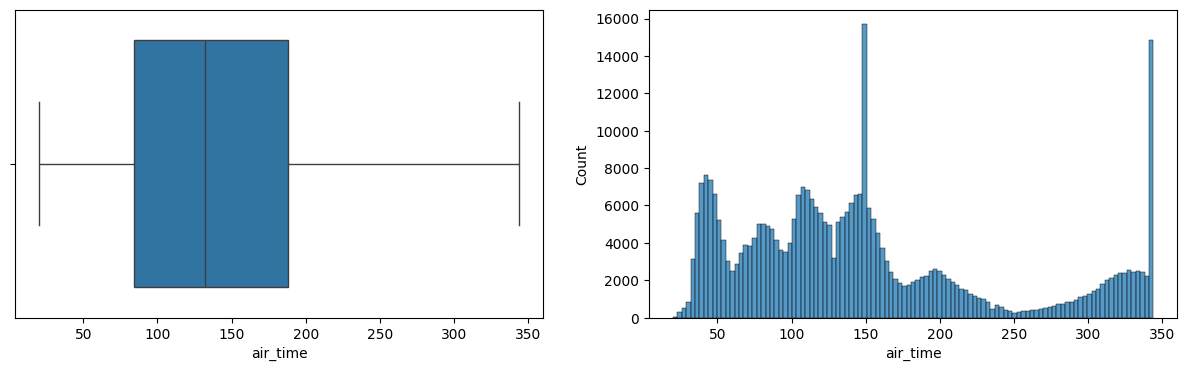

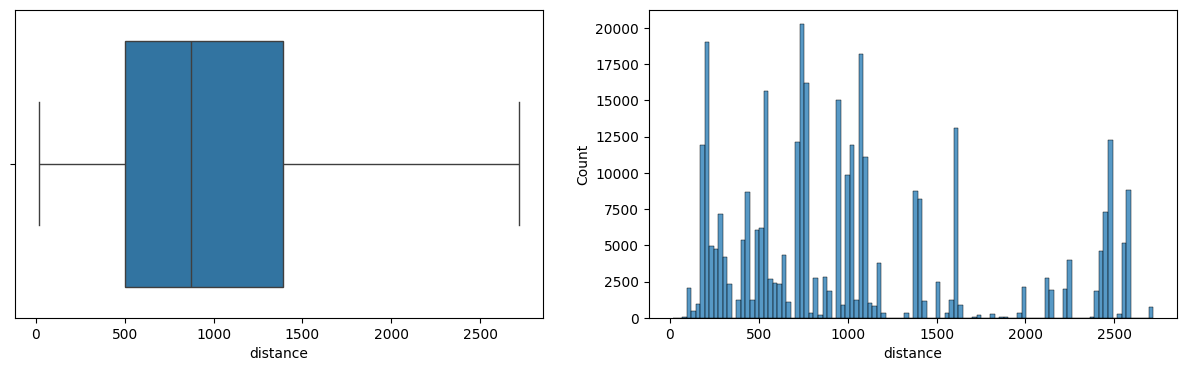

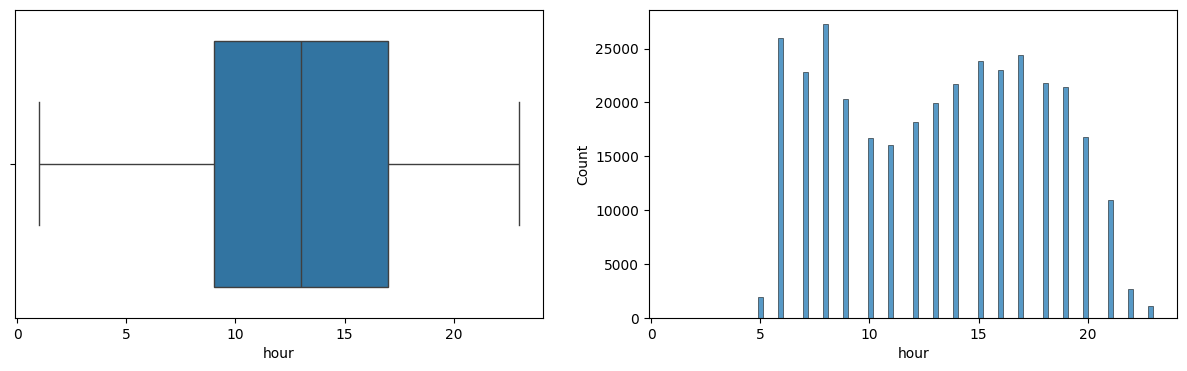

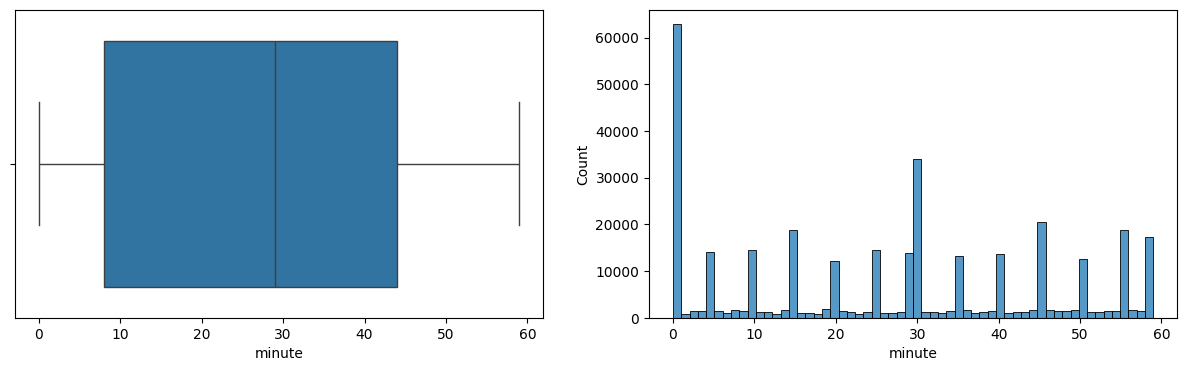

In [ ]:
graphics(df)

👇🏻 `Ou est la justification ?, qu'est-ce qui te permet dire que c'est la bonne methode ?`

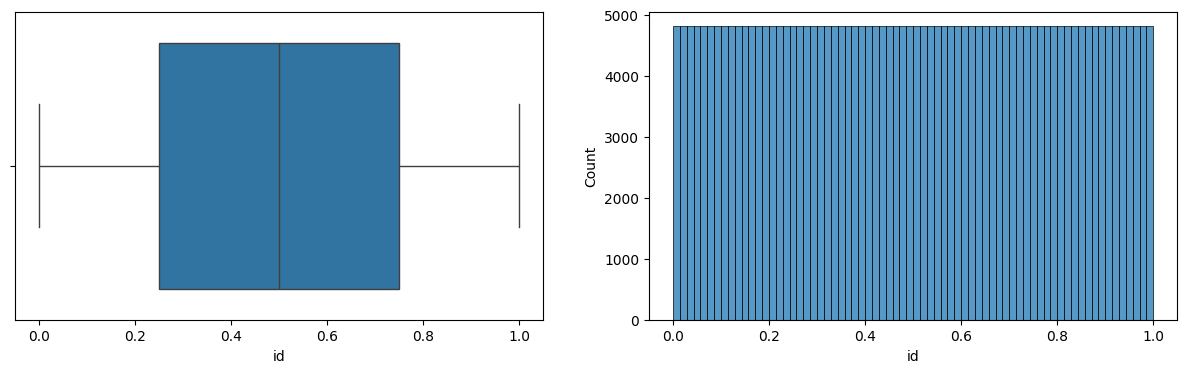

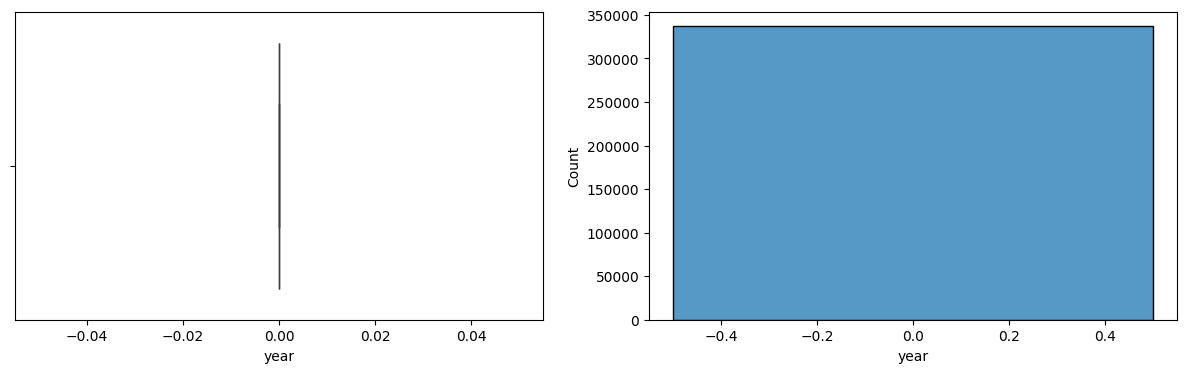

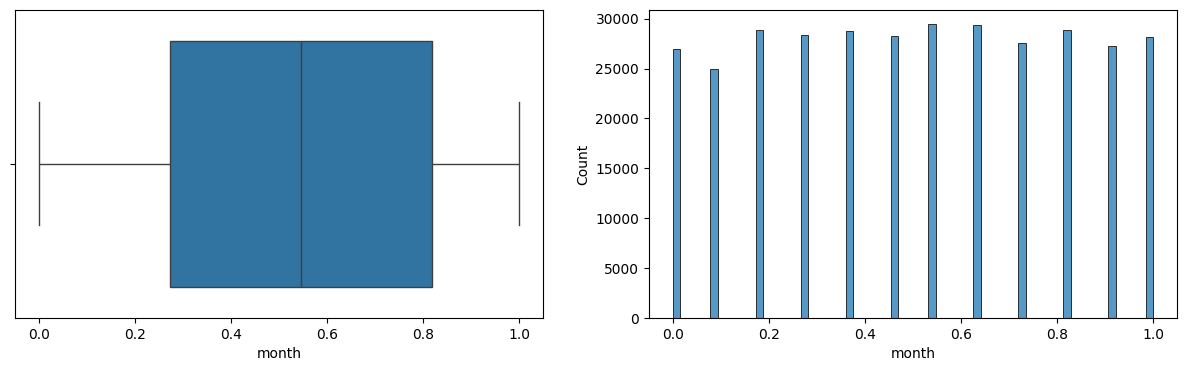

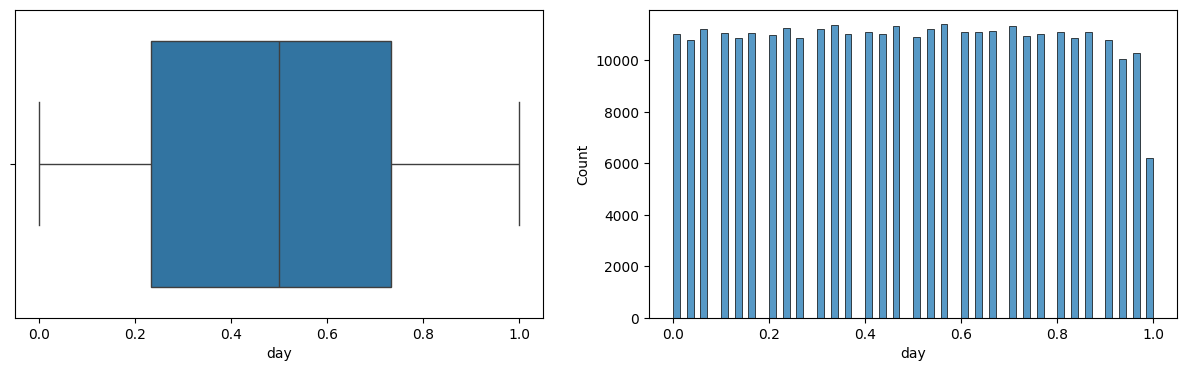

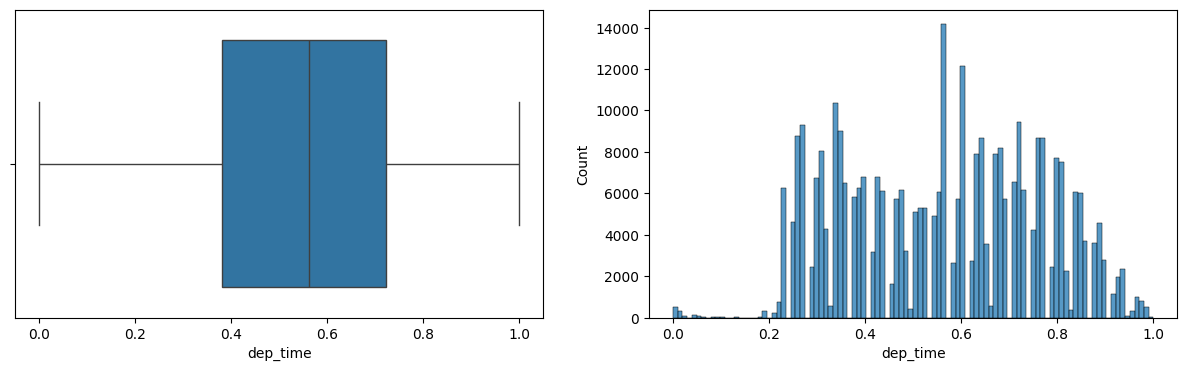

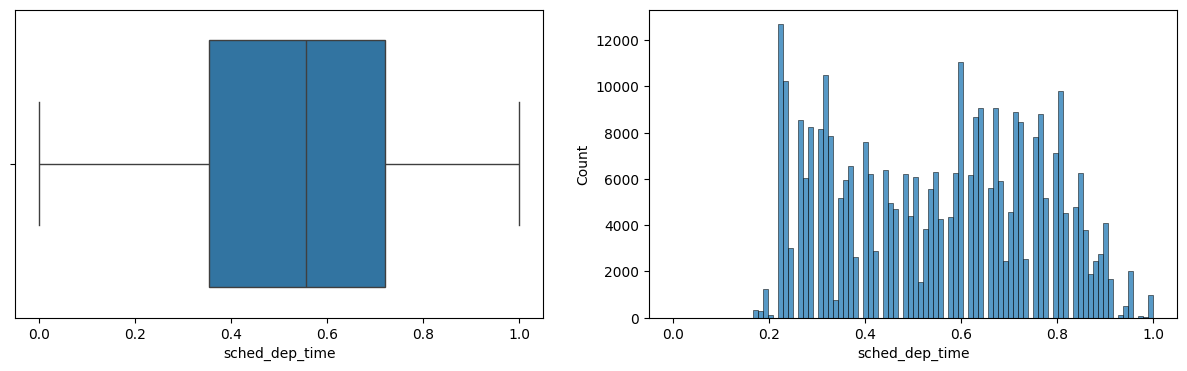

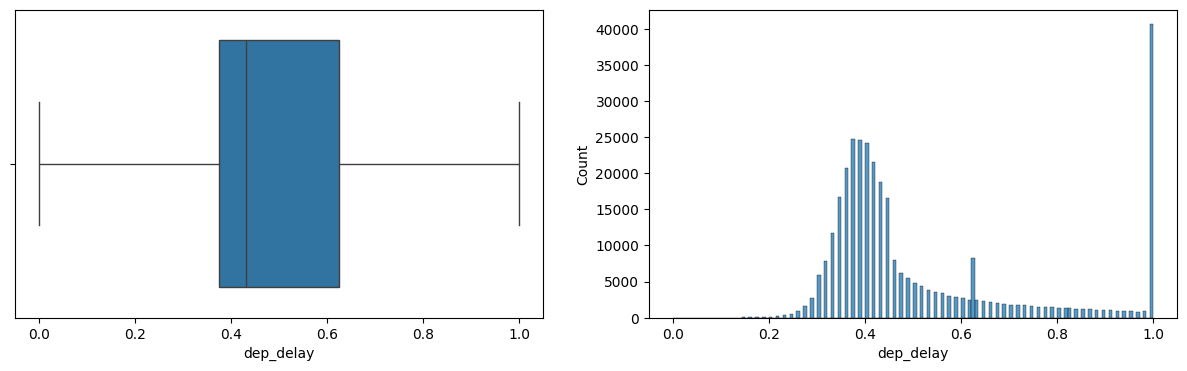

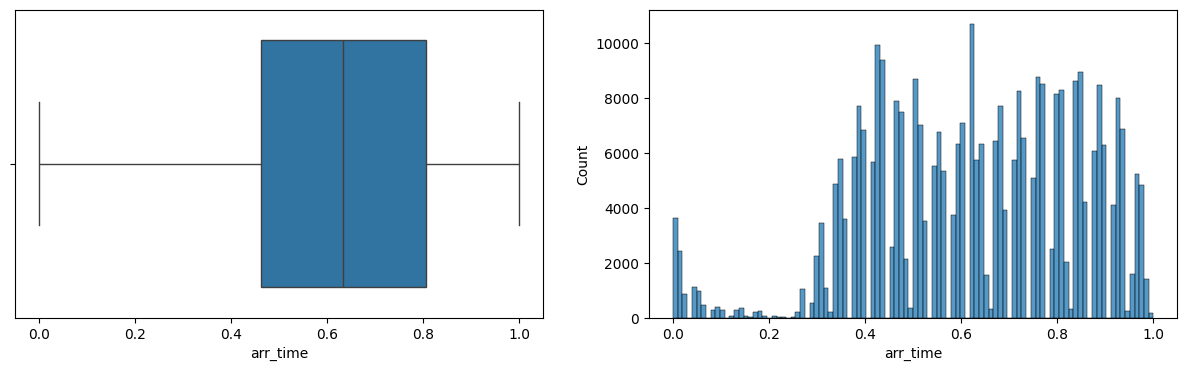

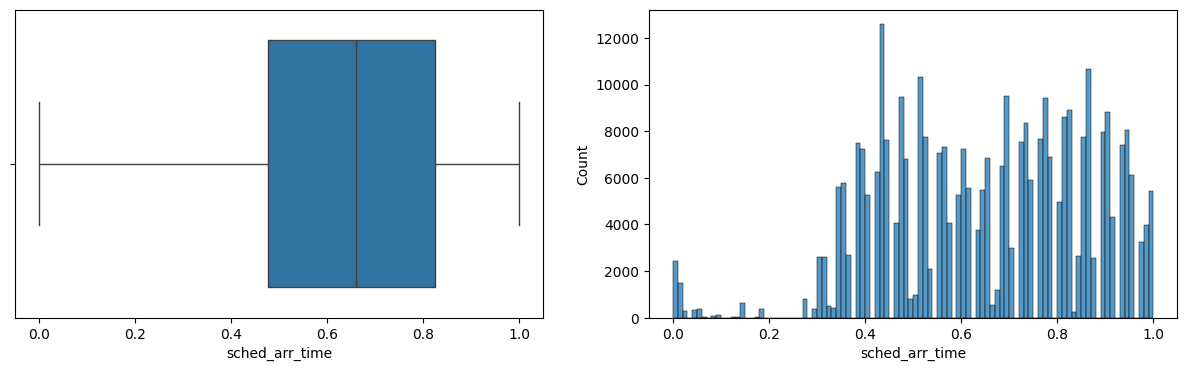

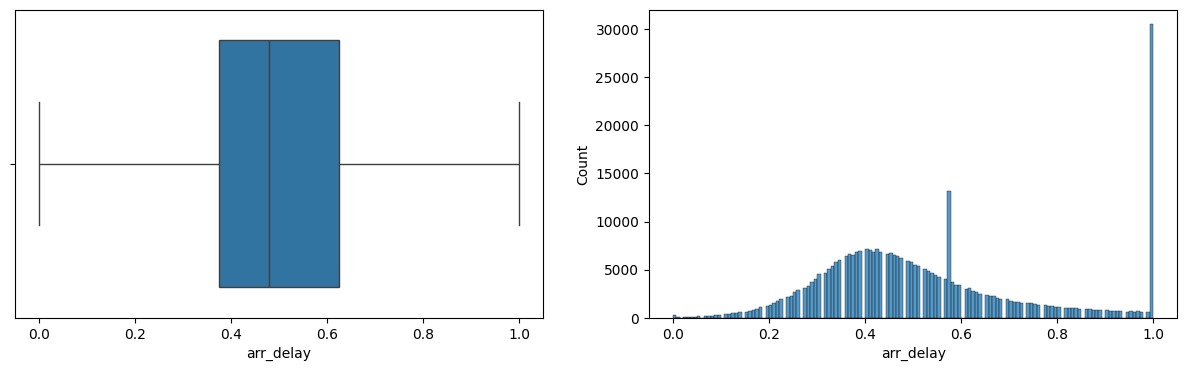

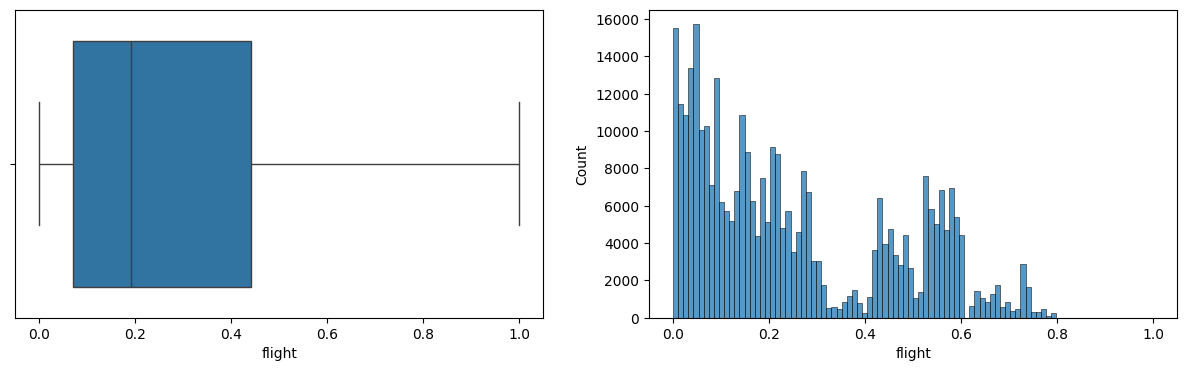

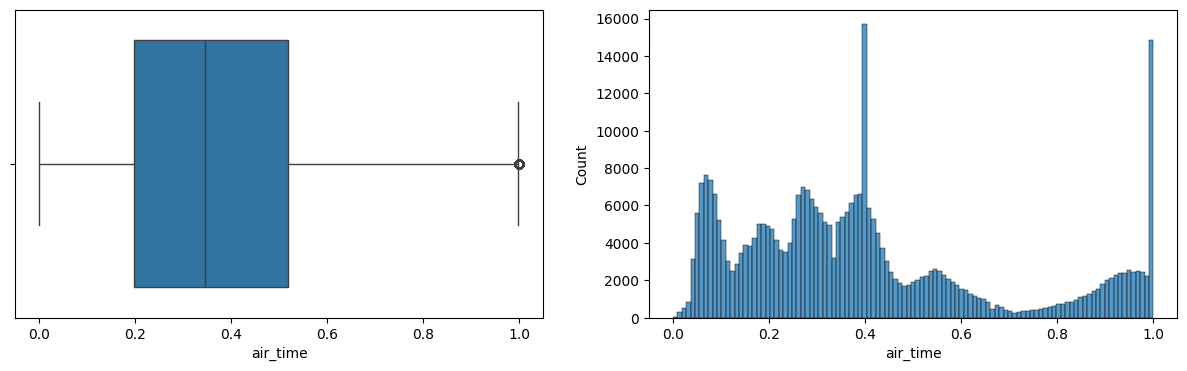

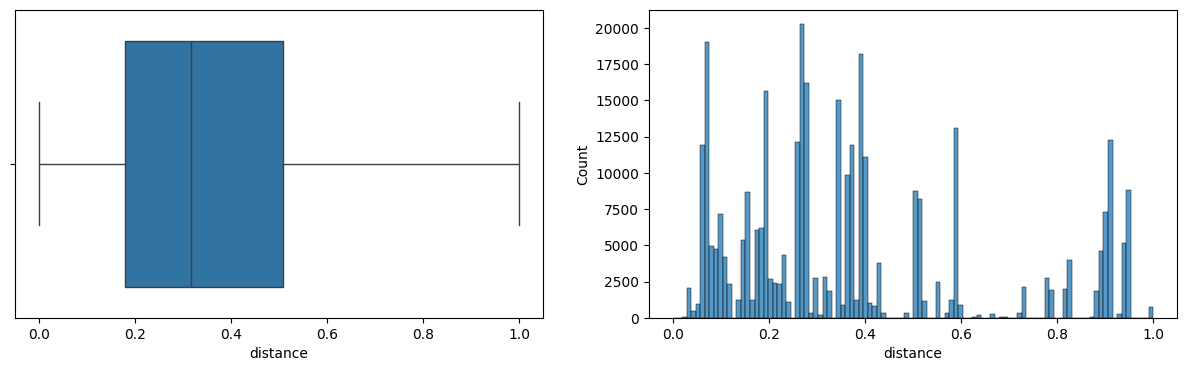

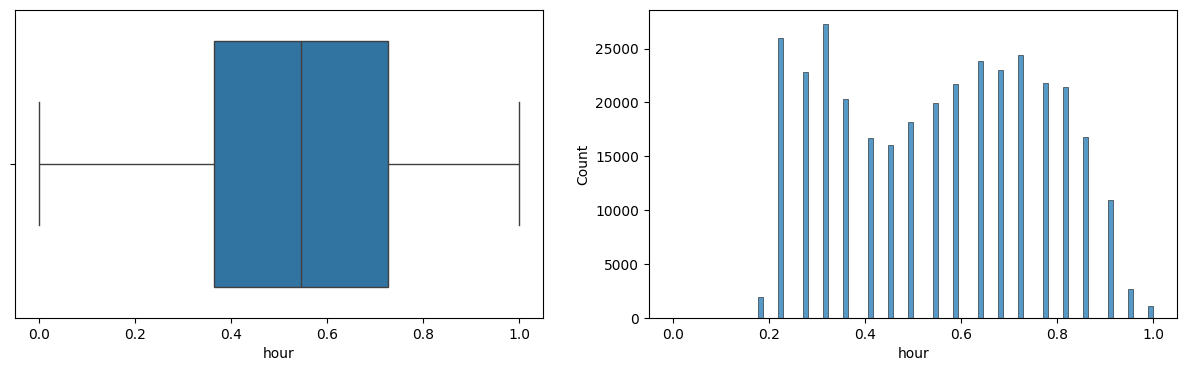

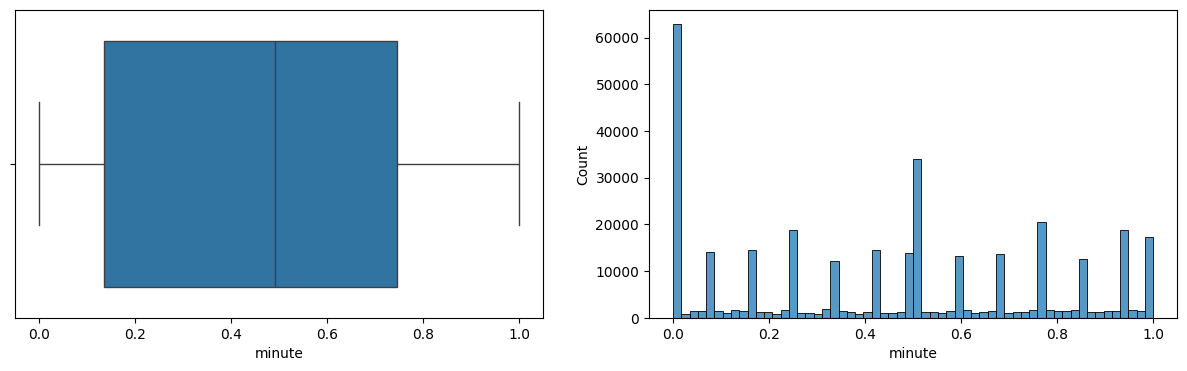

In [ ]:
num_vars = df.select_dtypes("number").columns
df[num_vars] = MinMaxScaler().fit_transform(df[num_vars])
graphics(df)

 ## Question 10: Encodage de la variable origin ✅

In [ ]:
df['origin'] = OneHotEncoder(sparse_output=False).fit_transform(df[['origin']])

df['origin']

,origin
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
336771,0.0
336772,0.0
336773,0.0
336774,0.0


## Question 11 : Sauvegarde

In [ ]:
df.to_csv('flights.csv') # 👈🏼 ❌ revoir la correction 

- Note: 14 / 20